# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 10 : Keras - Neural Network regression</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397


In questa esercitazione andremo ad applicare tecniche di regressione tramite machine learning su dei dati con un certo rumore con una Neural Network (NN). Valuteremo come l'abilità predittiva dipenda dalla struttura della NN.

# Descrizione del problema
Consideriamo un processo probabilistico che da origine a dati eichettati $(x,y)$ generati da partendo dall'equazione $$
    y_i= f(x_i) + \eta_i,
$$
dove $f(x_i)$ è fissata ma può non essere nota e $\eta_i$ è una rumore gaussiano non correlato tale che 
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
Ci riferiremo a $f(x_i)$ come alle **true features** usate per generare i dati. 
Per fare delle predizioni consideriamo una NN che dipende dai suoi parametri, pesi e biases. Le funzioni che la NN può modellare rappresentano la **model class** che utilizziamo per provare a definire un modello per i dati e fare delle previsioni. 
Per imparare i parametri della NN, alleneremo i nostri modella su un **training data set** e poi testeremo l'*efficienza* della NN su un *differente* dataset, il **validation data set**. 

Il punto del machine learning è infatti quello di fare delle previsioni su dati nuovi che non abbiamo mai visto. 

Per misurare l'abilità predittiva impareremo i nostri parametri, fittando il nostro dataset di training e facendo delle predizioni sul nostro data set. Una comune misuta di performance predittiva del nostro algoritmo consiste nel comparare le predizioni $\{y_j^\mathrm{pred}\}$ con i valori veri $\{y_j\}$.
Un metodo comune per misurare l'errore è il mean square-error (MSE) sul set di test:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
Cercheremo quindi di ottenere delle immagini qualitative esaminando grafici sulla validazione e i dati di training. 


## Linear fit
Partiamo considerando un caso semplice:
$$
f(x)=2x+1
$$ 

# Esercizio 1
Valutiamo come la regressione lineare dipenda dal numero di epoche,$N_{\mathrm{epochs}}$, dal numero di dati $N_{\mathrm{train}}$ e dal rumore $\sigma$. Miglioriamo quindi il risultato lavorando su questi parametri. 

In [6]:
# import of the importants packages 
import numpy as np
import matplotlib.pyplot as plt

# import of the modules needed 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2022-10-21 14:52:32.480263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 14:52:32.990011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-21 14:52:32.990060: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-10-21 14:52:34.434993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-21 14:52:34.435184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-21 14:52:34.435196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Creazione di una NN 

Una Neural Network non è altro che una successione di strati di un certo numero di neuroni ciascuno, tra loro collegati secondo definiti pesi e ciascun neurone avrà un definito bias, che permetterà uno shift della funzione di attivazione di un valore costante. 

L'ultimo Layer, l'output layer darà come output il valore corrispondente alla predizione con "valore" più alto
Per poter eseguire il fit di una retta si crea un modello molto semplice. 
Il model rappresenta la truttura di base in Keras e consiste in un contenutore di molti layers. La classe più semplice di modelli è il Sequential model che è una successione di layers. 
- Il primo layer deve ricevere informazioni sulla input shape, specificandolo come argomento.
- I layers successivi possono svolgere una deduzione automatica della shape del layer precedente. 

In questo caso utilizziamo un model formato da un unico layer, un Dense Layer, cioè un layer di NN connesse densamente. Dense implementa l'operazione *output = activation(dot(input, kernel) + bias)* dove activation è la funzinoe di attivazione passata come argomento, il kernel è una matrice di pesi creata dal layer, e bias è un vettore bias creato dal layer, applicabile de use_bias = True

In [2]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-10-21 11:51:14.878063: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-21 11:51:14.878100: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-21 11:51:14.878134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alessia-HP-ProBook-430-G3): /proc/driver/nvidia/version does not exist
2022-10-21 11:51:14.878431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Una volta definito il modello è necessario configurarlo per l'allenamento, tramite il metodo `model.compile` 

Definiamo gli argomenti:
- optimizer: specifica l'algoritmo di ottimizzazione che adatta i pesi dei layers durante il training.
- loss: specifica la funzione da minimizzare durante l'ottimizzazione;
- metrics: [opzionale] questo oggetto giudica la performance del modello ed è utilizzato per monitorare il training

In [3]:
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In questo caso utilizziamo 
- sgd : Gradient descent (with momentum) optimizer.
- mse : mean squared error
- 'mse' metrics calcola il mean squared error tra y_true e y_pred.

## Predizione Iniziale 


Facciamo una prima stima imponendo alcuni valori 
$N_{train} = 200$
$N_{valid} = 50$
$N_{epochs} = 50$
e valutiamo che stima riesce a fare il modello con questi valori

In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
sigma = 0.5 # noise standard deviation

N_train = 200 # Numbero of training data
N_valid = 50

# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid) #valori di x "veri" 
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [5]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50,shuffle=True,validation_data=(x_valid, y_valid))

Epoch 1/50
7/7 [==============================] - 0s 27ms/step - loss: 2.8389 - mse: 2.8389 - val_loss: 2.2089 - val_mse: 2.2089
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 2.4830 - mse: 2.4830 - val_loss: 1.9469 - val_mse: 1.9469
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 2.1945 - mse: 2.1945 - val_loss: 1.7134 - val_mse: 1.7134
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 1.9385 - mse: 1.9385 - val_loss: 1.5242 - val_mse: 1.5242
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 1.7270 - mse: 1.7270 - val_loss: 1.3694 - val_mse: 1.3694
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 1.5549 - mse: 1.5549 - val_loss: 1.2331 - val_mse: 1.2331
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 1.4024 - mse: 1.4024 - val_loss: 1.1209 - val_mse: 1.1209
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 1.2765 - mse: 1.2765 - val_loss: 

4/4 [==============================] - 0s 2ms/step


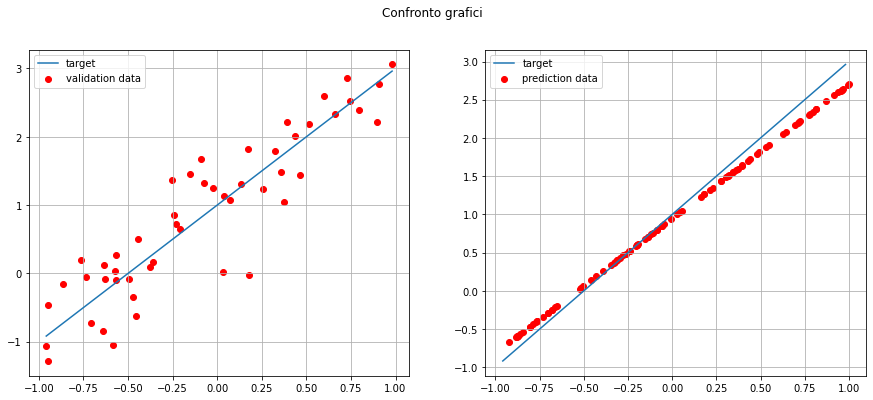

In [6]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Confronto grafici ')

# Adds subplot on position 1
ax1 = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

# plot validation and target dataset
ax1.plot(x_valid, y_target, label='target')
ax1.scatter(x_valid, y_valid, color='r', label='validation data')
ax1.legend()
ax1.grid(True)


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r',label='prediction data' )
ax2.plot(x_valid, y_target, label='target')
ax2.legend()
ax2.grid(True)


In [7]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)# calcola la loss e l'accuracy 

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.2350 - mse: 0.2350

Test loss: 0.2350124716758728
Test accuracy: 0.2350124716758728


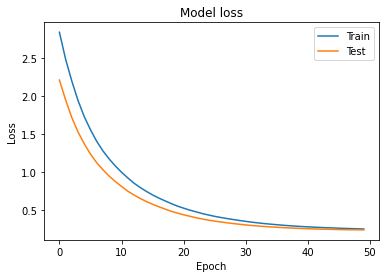

In [8]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


Osserviamo che i dati impostati non portano a dei risultati soddisfacenti. Valutiamo quindi di seguito come variano le stime e determiniamo su quali parametri lavorare per migliorare la stima

### Dipendenza dal numero di Epoche $N_{epochs}$

In [414]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [415]:
m = 2 # slope
b = 1 # intersect
sigma = 0.5 # noise standard deviation

N_train = 200 # Numbero of training data
N_valid = 50
# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid) #valori di x "veri" 
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [416]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,shuffle=True,validation_data=(x_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 0s 28ms/step - loss: 5.0573 - mse: 5.0573 - val_loss: 3.9881 - val_mse: 3.9881
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 4.5108 - mse: 4.5108 - val_loss: 3.5767 - val_mse: 3.5767
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 4.0444 - mse: 4.0444 - val_loss: 3.1997 - val_mse: 3.1997
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 3.6126 - mse: 3.6126 - val_loss: 2.8893 - val_mse: 2.8893
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 3.2618 - mse: 3.2618 - val_loss: 2.6019 - val_mse: 2.6019
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 2.9322 - mse: 2.9322 - val_loss: 2.3730 - val_mse: 2.3730
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 2.6741 - mse: 2.6741 - val_loss: 2.1683 - val_mse: 2.1683
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 2.4430 - mse: 2.4430 - v

In [417]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)# calcola la loss e l'accuracy 

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.2325 - mse: 0.2325

Test loss: 0.2324594110250473
Test accuracy: 0.2324594110250473


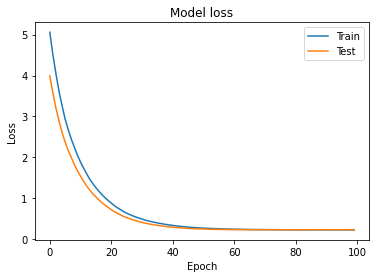

In [418]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


4/4 [==============================] - 0s 2ms/step


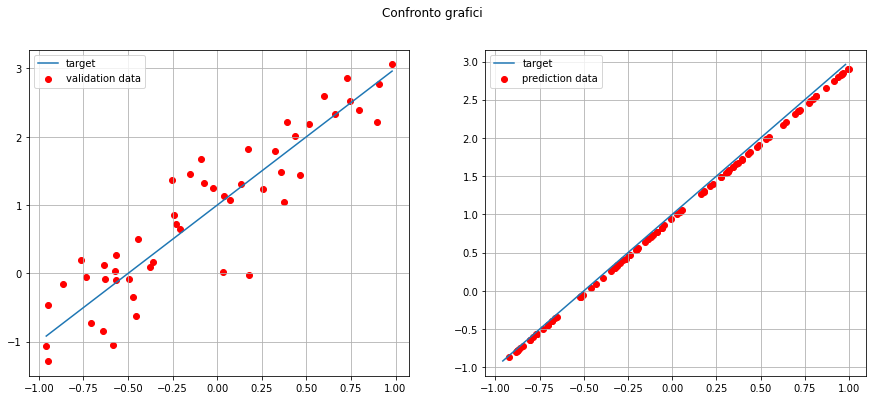

In [419]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Confronto grafici ')

# Adds subplot on position 1
ax1 = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

# plot validation and target dataset
ax1.plot(x_valid, y_target, label='target')
ax1.scatter(x_valid, y_valid, color='r', label='validation data')
ax1.legend()
ax1.grid(True)


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r',label='prediction data' )
ax2.plot(x_valid, y_target, label='target')
ax2.legend()
ax2.grid(True)


### Commento dei risultati 

Osserviamo il grafico rappresentante l'andamento della loss function in funzinoe del numero di epoche. 
Quello che osserviamo è che dopo un numero di circa 20 epoche il valore di Loss si stabilizza 

In [426]:
w = model.get_weights()
print('Result: y =  ' + str(w[0]) + ' x + ' + str(w[1]) )    
print('True : y = 2 x + 1' )  

Result: y =  [[1.9684163]] x + [0.9429152]
True : y = 2 x + 1


### Dipendenza dal numero di dati di Training $N_{train}$


Valutiamo ora la dipendenza dalle predizioni dai dati di training. 

In [44]:
m = 2 # slope
b = 1 # intersect
sigma = 0.5 # noise standard deviation
N_valid = 100
Ns_train = np.arange(100,600, 100)
N_epoch = 50

In [45]:
np.random.seed(0)# stesso seme per riproducibilità 
x_valid = np.random.uniform(-1, 1, 20) #valori di x "veri" 
y_valid = np.random.normal(m * x_valid + b, sigma)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
Loss_Test = []
Loss_Train =[]

5
Coolecting Data - N_Train = 100
Epoch 1/50
4/4 [==============================] - 0s 45ms/step - loss: 1.1515 - mse: 1.1515 - val_loss: 3.9006 - val_mse: 3.9006
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 1.0173 - mse: 1.0173 - val_loss: 3.7664 - val_mse: 3.7664
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.8998 - mse: 0.8998 - val_loss: 3.6514 - val_mse: 3.6514
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7960 - mse: 0.7960 - val_loss: 3.5481 - val_mse: 3.5481
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 0.7073 - mse: 0.7073 - val_loss: 3.4656 - val_mse: 3.4656
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.6333 - mse: 0.6333 - val_loss: 3.4076 - val_mse: 3.4076
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 3.3441 - val_mse: 3.3441
Epoch 8/50
4/4 [==============================] - 0s 13ms/step 

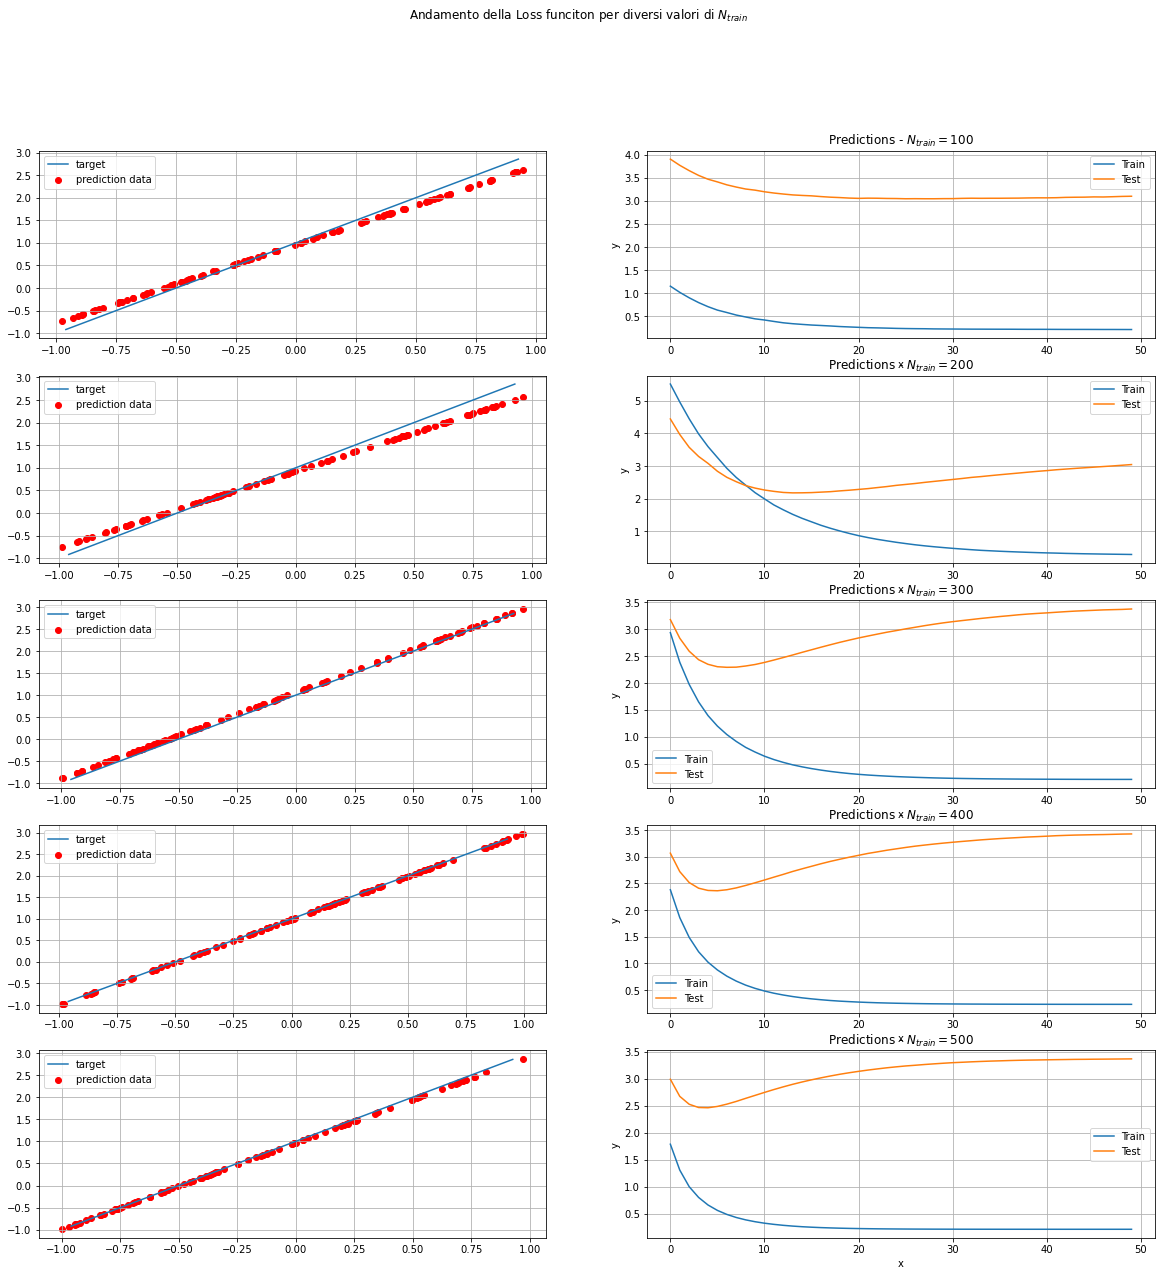

In [46]:
rows = Ns_train.size
print(rows)
fig, ax = plt.subplots(5, 2, figsize = (20, 20))
fig.suptitle("Andamento della Loss funciton per diversi valori di $N_{train}$")

for i in range(Ns_train.size):
    N_train = Ns_train[i]
    # create model
    print("Coolecting Data - N_Train = " + str(N_train))
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    #create training data
    x_train = np.random.uniform(-1, 1, N_train)
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epoch,shuffle=True,validation_data=(x_valid, y_valid))
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)# calcola la loss e l'accuracy
    
    #------------------------------------------
    #Plots 
    #------------------------------------------
    #training & validation loss values
    ax[i][1].plot(history.history['loss'])
    ax[i][1].plot(history.history['val_loss'])
    ax[i][1].set_title('Model loss - $N_{train} = $' + str(N_train))
    ax[i][1].set_ylabel('Loss')
    ax[i][1].set_xlabel('Epoch')
    ax[i][1].legend(['Train', 'Test'], loc='best')
    ax[i][1].grid()
    
    # plotting predictions
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    ax[i][0].scatter(x_predicted, y_predicted,color='r',label='prediction data' )
    ax[i][0].plot(x_valid, y_target, label='target')
    ax[i][1].set_title('Predictions - $N_{train} = $' + str(N_train))
    ax[i][1].set_ylabel('y')
    ax[i][1].set_xlabel('x')
    ax[i][0].legend()
    ax[i][0].grid(True)
    
    #saving data for following plot 
    #print(history.history['val_loss'][-1])
    Loss_Test.append(history.history['val_loss'][-1])
    Loss_Train.append(history.history['loss'][-1])
    

In [47]:
print(Loss_Test)
print(Loss_Train)

[3.097350835800171, 3.046520709991455, 3.3748230934143066, 3.425835132598877, 3.370593547821045]
[0.21290293335914612, 0.2966216802597046, 0.20616348087787628, 0.23361001908779144, 0.21435168385505676]


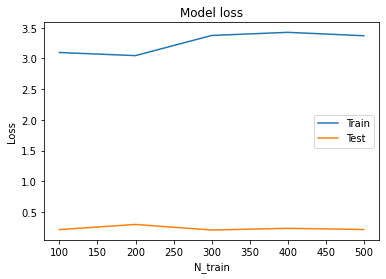

In [48]:
# look into training history
# Plot training & validation loss values
plt.plot(Ns_train,Loss_Test )
plt.plot(Ns_train,Loss_Train )
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('N_train')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

### Dipendenza dal rumore $\sigma$

Per studiare l'andamento della loss function in funzione di diversi valori di sigma, fissiamoci a dei valori di N epochs e N trains e analizziamo l'andamento della funzione loss in funzione di diversi valori di sigma.  

In [49]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [54]:
#creo vettore di diversi valori di N_train 
sigmas = np.arange(0.1,1., 0.05)
N_epoch = 50
N_valid = 50
N_train = 400 
#parameters
m = 2 # slope
b = 1 # intersect

Loss_values =[]

In [55]:
# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
x_valid = np.random.uniform(-1, 1, 20) #valori di x "veri" 
x_train = np.random.uniform(-1, 1, 30)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

for sigma in sigmas:
    y_valid = np.random.normal(m * x_valid + b, sigma)
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epoch,shuffle=True,validation_data=(x_valid, y_valid))
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)# calcola la loss e l'accuracy
    Loss_values.append(score[0])  
    



Epoch 1/50
1/1 [==============================] - 0s 73ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0426 - val_mse: 0.0426
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0407 - val_mse: 0.0407
Epoch 5/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 6/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 8/50
1/1 [==============================] - 0s 40ms/step - loss: 0.0327 - mse: 0.0327 - val

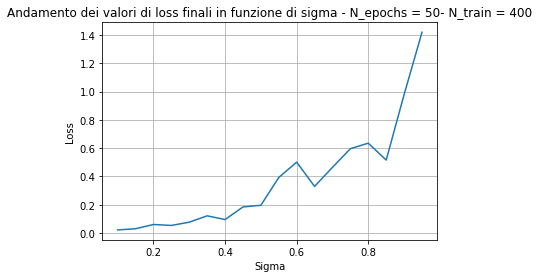

In [57]:
# look into training history
# Plot training & validation loss values
import numpy as np
import matplotlib.pyplot as plt
plt.plot(sigmas,Loss_values )
plt.plot()
plt.title('Andamento dei valori di loss finali in funzione di sigma - N_epochs = ' + str (N_epoch) + '- N_train = ' + str (N_train))
plt.ylabel('Loss')
plt.xlabel('Sigma')
plt.grid()
plt.show()

Osserviamo che l'andamento della loss function in funzione di diversi valori di sigma osserviamo un andamento crescente della funzione come ci potrammo aspettare: a parità di N epochs e N train la loss function aumenta, e quindi il fit peggiore all'aumentare dell'errore che si introduce sui dati di test. 


 ### Osservazioni Ulteriori
 Valutiamo come si comporta il modello quando proviamo a fare un fit includendo dati al di fuori dell'intervallo di training

In [450]:
#Definizione del modello 
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [451]:
#creo vettore di diversi valori di N_train 
sigma = 0.5
N_epoch = 100
N_valid = 100
N_train = 500 
#parameters
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
x_valid = np.random.uniform(-1, 1, 20) #valori di x "veri" 
x_train = np.random.uniform(-1, 1, 30)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
y_valid = np.random.normal(m * x_valid + b, sigma)
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters

In [452]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epoch,shuffle=True,validation_data=(x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)# calcola la loss e l'accuracy
Loss_values.append(score[0])     

Epoch 1/100
1/1 [==============================] - 0s 496ms/step - loss: 1.9901 - mse: 1.9901 - val_loss: 2.3498 - val_mse: 2.3498
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 1.9415 - mse: 1.9415 - val_loss: 2.2932 - val_mse: 2.2932
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 1.8946 - mse: 1.8946 - val_loss: 2.2385 - val_mse: 2.2385
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 1.8493 - mse: 1.8493 - val_loss: 2.1856 - val_mse: 2.1856
Epoch 5/100
1/1 [==============================] - 0s 48ms/step - loss: 1.8056 - mse: 1.8056 - val_loss: 2.1344 - val_mse: 2.1344
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 1.7634 - mse: 1.7634 - val_loss: 2.0849 - val_mse: 2.0849
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 1.7226 - mse: 1.7226 - val_loss: 2.0370 - val_mse: 2.0370
Epoch 8/100
1/1 [==============================] - 0s 49ms/step - loss: 1.6833 - mse: 1.6

In [453]:
x_predicted_1 = np.random.uniform(-1.5, 1.5, 100)
y_predicted_1 = model.predict(x_predicted)

4/4 [==============================] - 0s 2ms/step


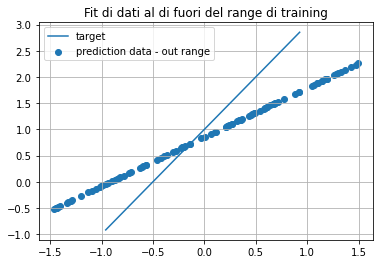

In [454]:
plt.title('Fit di dati al di fuori del range di training')
plt.scatter(x_predicted_1, y_predicted_1,label='prediction data - out range' )
plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.grid(True)
plt.show()

Osserviamo che provare a fittare una funzione utilizzando un range più ampio rispetto al range di training, determina una stima sbagliata del fit. 

# Esercizio 2
Estendiamo il modello per ottenere un ragionevole fit della seguente funzione polinomiale di ordine 3:
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.
Trovare un ragionevole valore : 
- layers
- neurons per ciascun layer
- activation function
- optimizer
- loss function

Controllare il NN model per valutare quanto bene predice nuovi dati generati. 

by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Soluzione 

Iniziamo a definire i parametri della funzione di cui stiamo andando a studiare il plot 

In [58]:
#Definisco valori veri del momento angolare e valore del termine noto 
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 2 
b = 1 
c = 4
d = 6

In [59]:
# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 1000
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function
sigma = 0.5

Iniziamo con il fissare il valore di sigma a 0.5 e procediamo a fare una prova preliminare, utilizzando il modello lineare per fittare la funzione polinomiale proposta. Ci aspettiamo un fit molto impreciso.  

In [60]:
# first NN model for the polynomial function 
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
N_epochs = 100

In [61]:

y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)

score =  model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid))

# risutlati del fit 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)




4/4 [==============================] - 0s 2ms/step - loss: 24.7653 - mse: 24.7653
Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 17.3168 - mse: 17.3168 - val_loss: 13.8049 - val_mse: 13.8049
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 9.7261 - mse: 9.7261 - val_loss: 8.9577 - val_mse: 8.9577
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5244 - mse: 6.5244 - val_loss: 6.6102 - val_mse: 6.6102
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9450 - mse: 4.9450 - val_loss: 5.2679 - val_mse: 5.2679
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0383 - mse: 4.0383 - val_loss: 4.4288 - val_mse: 4.4288
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4862 - mse: 3.4862 - val_loss: 3.9067 - val_mse: 3.9067
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1479 - mse: 3.1479 - val_loss: 3.5536 - val_mse: 3.55

Loss value = 2.539506673812866


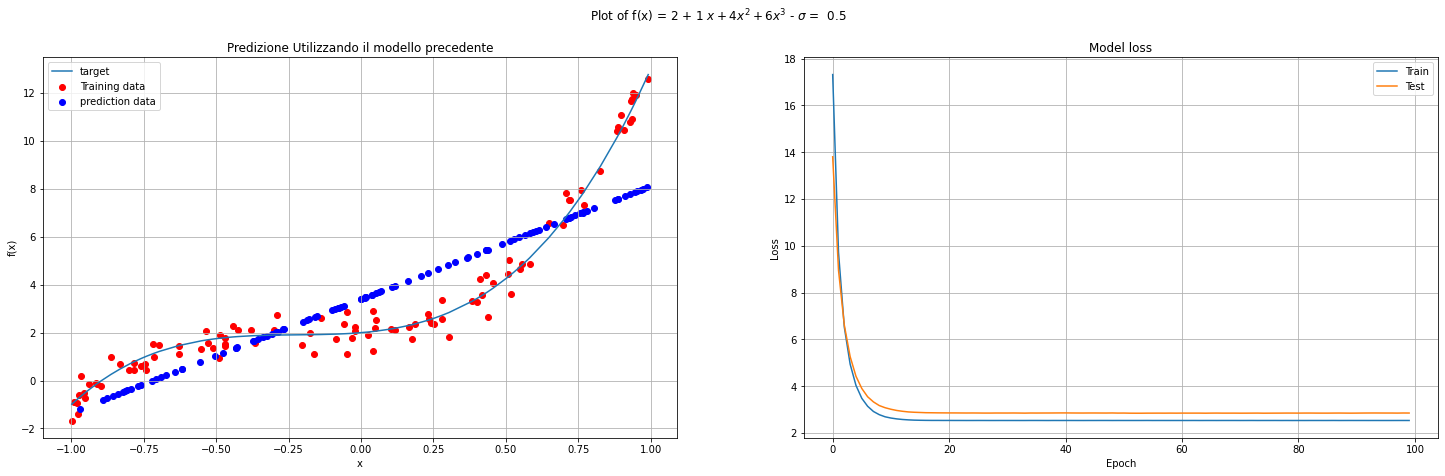

In [64]:
fig, axs = plt.subplots(1, 2, figsize = (25, 7))
fig.suptitle('Plot of f(x) = ' + str (a) + ' + ' + str(b) + ' $x + $' + str(c) + '$x^2 + $' + str(d) + '$x^3$ - $\sigma$ =  ' + str(sigma ) )
title = "Predizione Utilizzando il modello precedente"
#plot dei grafici iniziale - target e train data 
axs[0].set_title(title)
axs[0].plot(x_valid, y_target, label='target')
axs[0].scatter(x_valid, y_valid, color='r', label='Training data')
axs[0].scatter(x_predicted, y_predicted,color='b',label='prediction data' )
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()
axs[0].grid(True)

# loss function     
# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='best')
axs[1].grid()

print('Loss value = ' + str (history.history['loss'][-1]))

Come atteso, il valore della loss è elevato e dalla figura appare chiaro come i valori predetti si allontanano dalla polinomiale. 
Modifichiamo allora il nostro modello, aggiungendo layers alla nostra rete neurale. Per fare una analisi preliminare, mantenendoci su fissati valori di sigma e N epochs e N trains, testiamo diverse funzioni di attivazione per valutare quali ci permettono di ottenere dei risultati migliori 

## Creazione di una nuova NN


### Analisi del problema e deduzione del modello adeguato 
A differenza del modello precedente, sarà necessario aggiungere uno o più layers al modello ed esplorare quale funzione di attivazione può essere adeguata 

In [508]:
# import of the importants packages 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz
from IPython.display import Image

Testiamo ora alcuni modelli, attuando delle modifiche e valutando quale struttura permette di ottenere dei risultati migliori 

### Modelli di Test 

Partiamo testando alcuni modelli composte da 1 layer e da 2 layers: ipotizziamo infatti che il modello adeguato per fittare una funzione polinomiale sia più complicato rispetto al precedente ma non eccessivamente complesso. 
Testiamo diversi modelli caratterizzati da 1 layer, di cui variamo il numero di neuroni del layer. 
Leggendo la dcumentazione studiamo che le funzioni di attivazioni che potrebbero essere più adeguate sono : 
    
    relu
    elu
    tanh

Per questa prima parte di analisi utilizziamo sempre come funzione di attivazione la 'relu' e impostiamo come funzione per la loss function 'mse' e come ottimizzatore 'sgd'

Fissiamo $N_{train} =10000$ e un numero $N_{epochs}$

In [546]:
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
sigma = 0.5
N_epochs = 100

x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function
y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)
N_dense = [2, 5, 10, 20]

In [571]:
def model_1layer(Ndense):
    model = Sequential()
    model.add(Dense(units=Ndense, input_dim = 1))
    model.add(Activation("tanh"))
    model.add(Dense(units=1))
    model.compile(loss= 'mse', optimizer = 'sgd')
    return model

In [572]:
#visualizer(model, format='png')
#Image(filename='graph.png',width=500) 
#model.summary()

Quindi di seguito impostiamo il calcolo per determinare quale funzione di attivazione si adatta meglio 

In [577]:
score = []
history = []
x_predicted = []
y_predicted = []
for i in range(len(N_dense)):
    print("N dense = " + str(N_dense[i]) )
    model = model_1layer(N_dense[i])
    score.append(model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    history.append(model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))
    # risutlati del fit 
    x_predicted.append(  np.random.uniform(-1, 1, 100))
    y_predicted.append( model.predict(x_predicted[i]))


N dense = 2
4/4 [==============================] - 0s 2ms/step - loss: 25.4733
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 4.0734 - val_loss: 1.9639
Epoch 2/100
313/313 [==============================] - 0s 1ms/step - loss: 1.0088 - val_loss: 0.8619
Epoch 3/100
313/313 [==============================] - 0s 1ms/step - loss: 0.5285 - val_loss: 0.5344
Epoch 4/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3965 - val_loss: 0.4268
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3513 - val_loss: 0.3732
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3327 - val_loss: 0.3722
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3239 - val_loss: 0.3663
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3180 - val_loss: 0.3319
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3147 - val_loss: 0.3276
Epoch 10/100

N dense = 2: loss = 0.26088646054267883
N dense = 5: loss = 0.26126617193222046
N dense = 10: loss = 0.2488059103488922
N dense = 20: loss = 0.2511996030807495


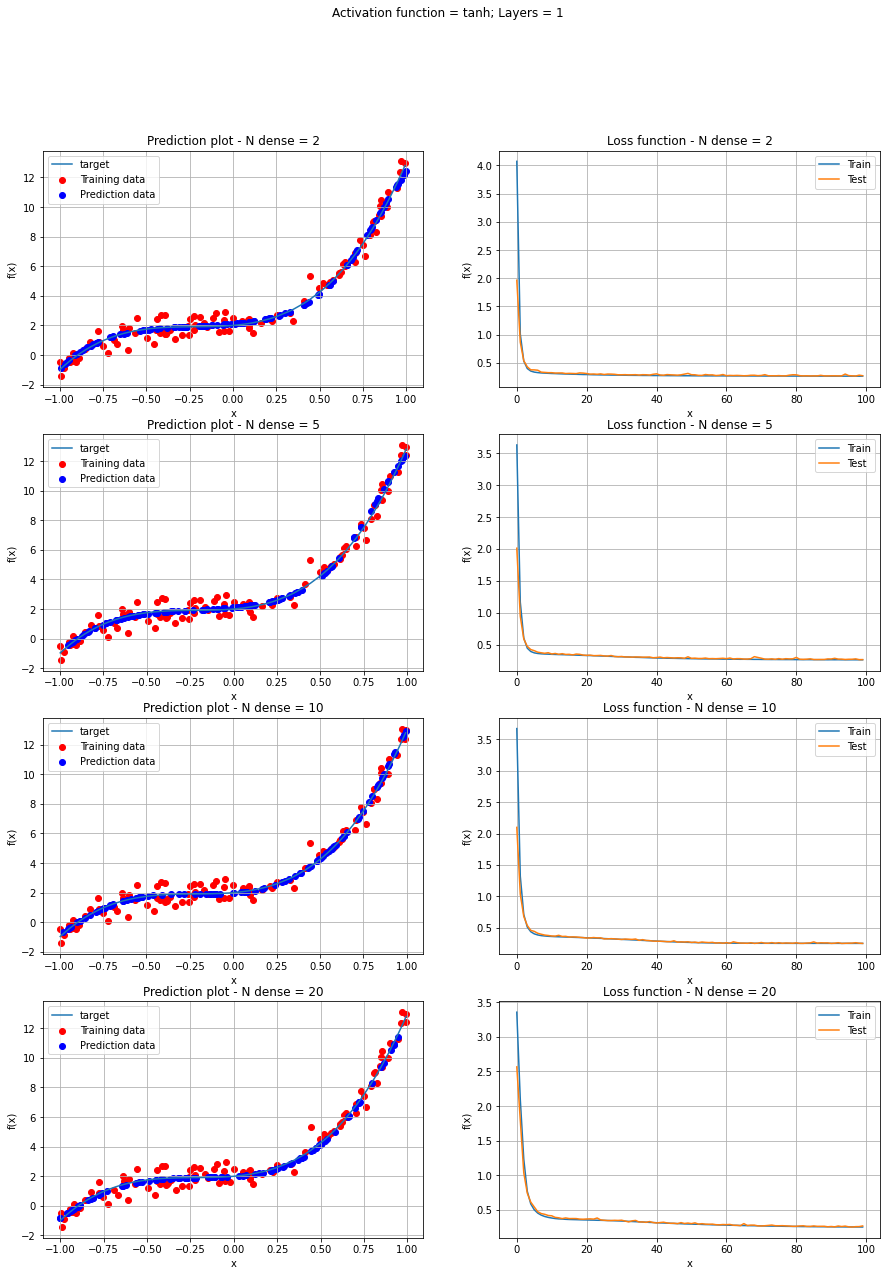

In [583]:
fig, axs = plt.subplots(len(N_dense), 2, figsize = (15, 20))
#plot dei grafici iniziale - target e train data 
fig.suptitle("Activation function = tanh; Layers = 1")
    
for i in range(len(N_dense)):
    print("N dense = " + str(N_dense[i])+ ": loss = " + str(history[i].history['loss'][-1]) )
    
    axs[i,0].set_title("Prediction plot - N dense = " + str(N_dense[i]))
    axs[i,0].plot(x_valid, y_target, label='target')
    axs[i,0].scatter(x_valid, y_valid, color='r', label='Training data')
    axs[i,0].scatter(x_predicted[i], y_predicted[i],color='b',label='Prediction data' )
    axs[i,0].set_xlabel('x')
    axs[i,0].set_ylabel('f(x)')
    axs[i,0].legend()
    axs[i,0].grid(True)
        
    axs[i,1].set_title("Loss function - N dense = " + str(N_dense[i]))
    axs[i,1].plot(history[i].history['loss'], label = "Train")
    axs[i,1].plot(history[i].history['val_loss'], label = "Test")
    axs[i,1].set_xlabel('x')
    axs[i,1].set_ylabel('f(x)')
    axs[i,1].legend()
    axs[i,1].grid(True)

### modelli 2 layers 


In [587]:
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
sigma = 0.5
N_epochs = 100

x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function
y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)
N_dense = [2, 5, 10, 20]

In [588]:
def model_2layer(Ndense):
    model = Sequential()
    model.add(Dense(units=Ndense, input_dim = 1))
    model.add(Activation("tanh"))
    model.add(Activation("tanh"))
    model.add(Dense(units=1))
    model.compile(loss= 'mse', optimizer = 'sgd')
    return model

In [589]:
#visualizer(model, format='png')
#Image(filename='graph.png',width=500) 
#model.summary()

Quindi di seguito impostiamo il calcolo per determinare quale funzione di attivazione si adatta meglio 

In [590]:
score = []
history = []
x_predicted = []
y_predicted = []
for i in range(len(N_dense)):
    print("N dense = " + str(N_dense[i]) )
    model = model_2layer(N_dense[i])
    score.append(model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    history.append(model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))
    # risutlati del fit 
    x_predicted.append(  np.random.uniform(-1, 1, 100))
    y_predicted.append( model.predict(x_predicted[i]))


N dense = 2
4/4 [==============================] - 0s 2ms/step - loss: 23.0176
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 4.7740 - val_loss: 2.2796
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 1.1641 - val_loss: 1.0203
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6248 - val_loss: 0.6577
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4693 - val_loss: 0.5260
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4127 - val_loss: 0.4657
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3876 - val_loss: 0.4377
Epoch 7/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3730 - val_loss: 0.4147
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3636 - val_loss: 0.4062
Epoch 9/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3565 - val_loss: 0.3857
Epoch 10/100

N dense = 2: loss = 0.26523879170417786
N dense = 5: loss = 0.24907349050045013
N dense = 10: loss = 0.24821819365024567
N dense = 20: loss = 0.24841201305389404


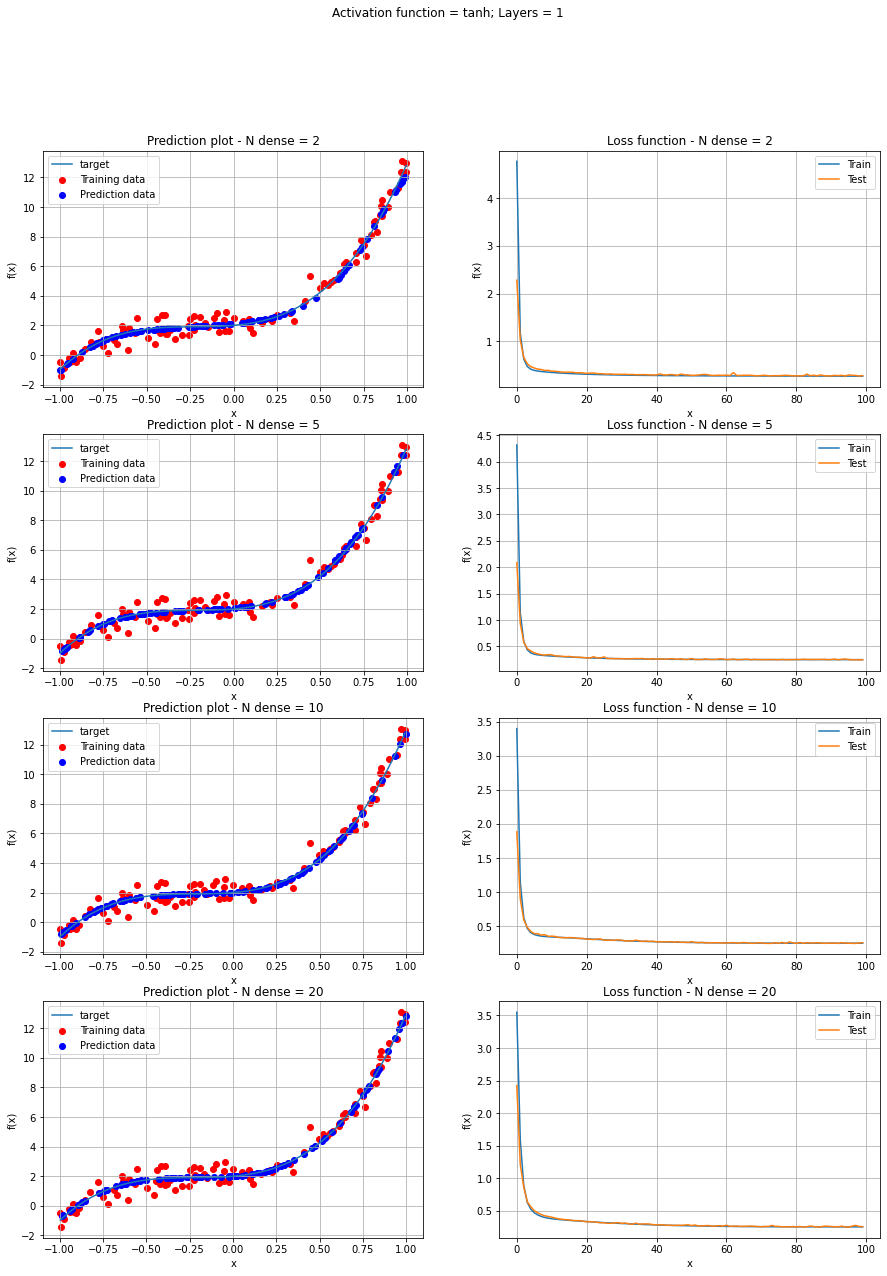

In [591]:
fig, axs = plt.subplots(len(N_dense), 2, figsize = (15, 20))
#plot dei grafici iniziale - target e train data 
fig.suptitle("Activation function = tanh; Layers = 1")
    
for i in range(len(N_dense)):
    print("N dense = " + str(N_dense[i])+ ": loss = " + str(history[i].history['loss'][-1]) )
    
    axs[i,0].set_title("Prediction plot - N dense = " + str(N_dense[i]))
    axs[i,0].plot(x_valid, y_target, label='target')
    axs[i,0].scatter(x_valid, y_valid, color='r', label='Training data')
    axs[i,0].scatter(x_predicted[i], y_predicted[i],color='b',label='Prediction data' )
    axs[i,0].set_xlabel('x')
    axs[i,0].set_ylabel('f(x)')
    axs[i,0].legend()
    axs[i,0].grid(True)
        
    axs[i,1].set_title("Loss function - N dense = " + str(N_dense[i]))
    axs[i,1].plot(history[i].history['loss'], label = "Train")
    axs[i,1].plot(history[i].history['val_loss'], label = "Test")
    axs[i,1].set_xlabel('x')
    axs[i,1].set_ylabel('f(x)')
    axs[i,1].legend()
    axs[i,1].grid(True)

Queste analisi ci portano ad osservare come un modello più adeguato sia rappresentato dall'utilizzo di un modello a due strati con un numero di neuroni per strati = 10

## Analisi delle diverse funzioni di attivazione

In [593]:
def model_2layer(Ndense, act):
    model = Sequential()
    model.add(Dense(units=Ndense, input_dim = 1))
    model.add(Activation(act))
    model.add(Activation(act))
    model.add(Dense(units=1))
    model.compile(loss= 'mse', optimizer = 'sgd')
    return model

In [594]:
# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function
sigma = 0.5
N_epochs = 100
ac_functions = ["relu", "elu", "tanh","softmax", "selu", "exponential", "softsign", "sigmoid"]
y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)

# array to save values 
scores = [] 
histories = []
x_predicteds = []
y_predicteds = []

In [595]:
for i in range(len(ac_functions)):
    # creation of the model 
    model_2layer(10, ac_functions[i])

    scores.append (  model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    histories.append ( model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))

    # risutlati del fit 
    x_predicteds.append ( np.random.uniform(-1, 1, 100))
    y_predicteds.append ( model.predict(x_predicteds[i]))    

4/4 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2482 - val_loss: 0.2472
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2480 - val_loss: 0.2543
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2482 - val_loss: 0.2624
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2483 - val_loss: 0.2573
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2478 - val_loss: 0.2515
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2480 - val_loss: 0.2502
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.2481 - val_loss: 0.2526
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2479 - val_loss: 0.2515
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2481 - val_loss: 0.2619
Epoch 10/100
313/313 [===

Values for activaction function relu - Val loss = 0.25471076369285583
-----------------------------------------------------
Values for activaction function elu - Val loss = 0.25245869159698486
-----------------------------------------------------
Values for activaction function tanh - Val loss = 0.2519065737724304
-----------------------------------------------------
Values for activaction function softmax - Val loss = 0.24882861971855164
-----------------------------------------------------
Values for activaction function selu - Val loss = 0.26145821809768677
-----------------------------------------------------
Values for activaction function exponential - Val loss = 0.25412678718566895
-----------------------------------------------------
Values for activaction function softsign - Val loss = 0.2528649866580963
-----------------------------------------------------
Values for activaction function sigmoid - Val loss = 0.2545554041862488
-------------------------------------------------

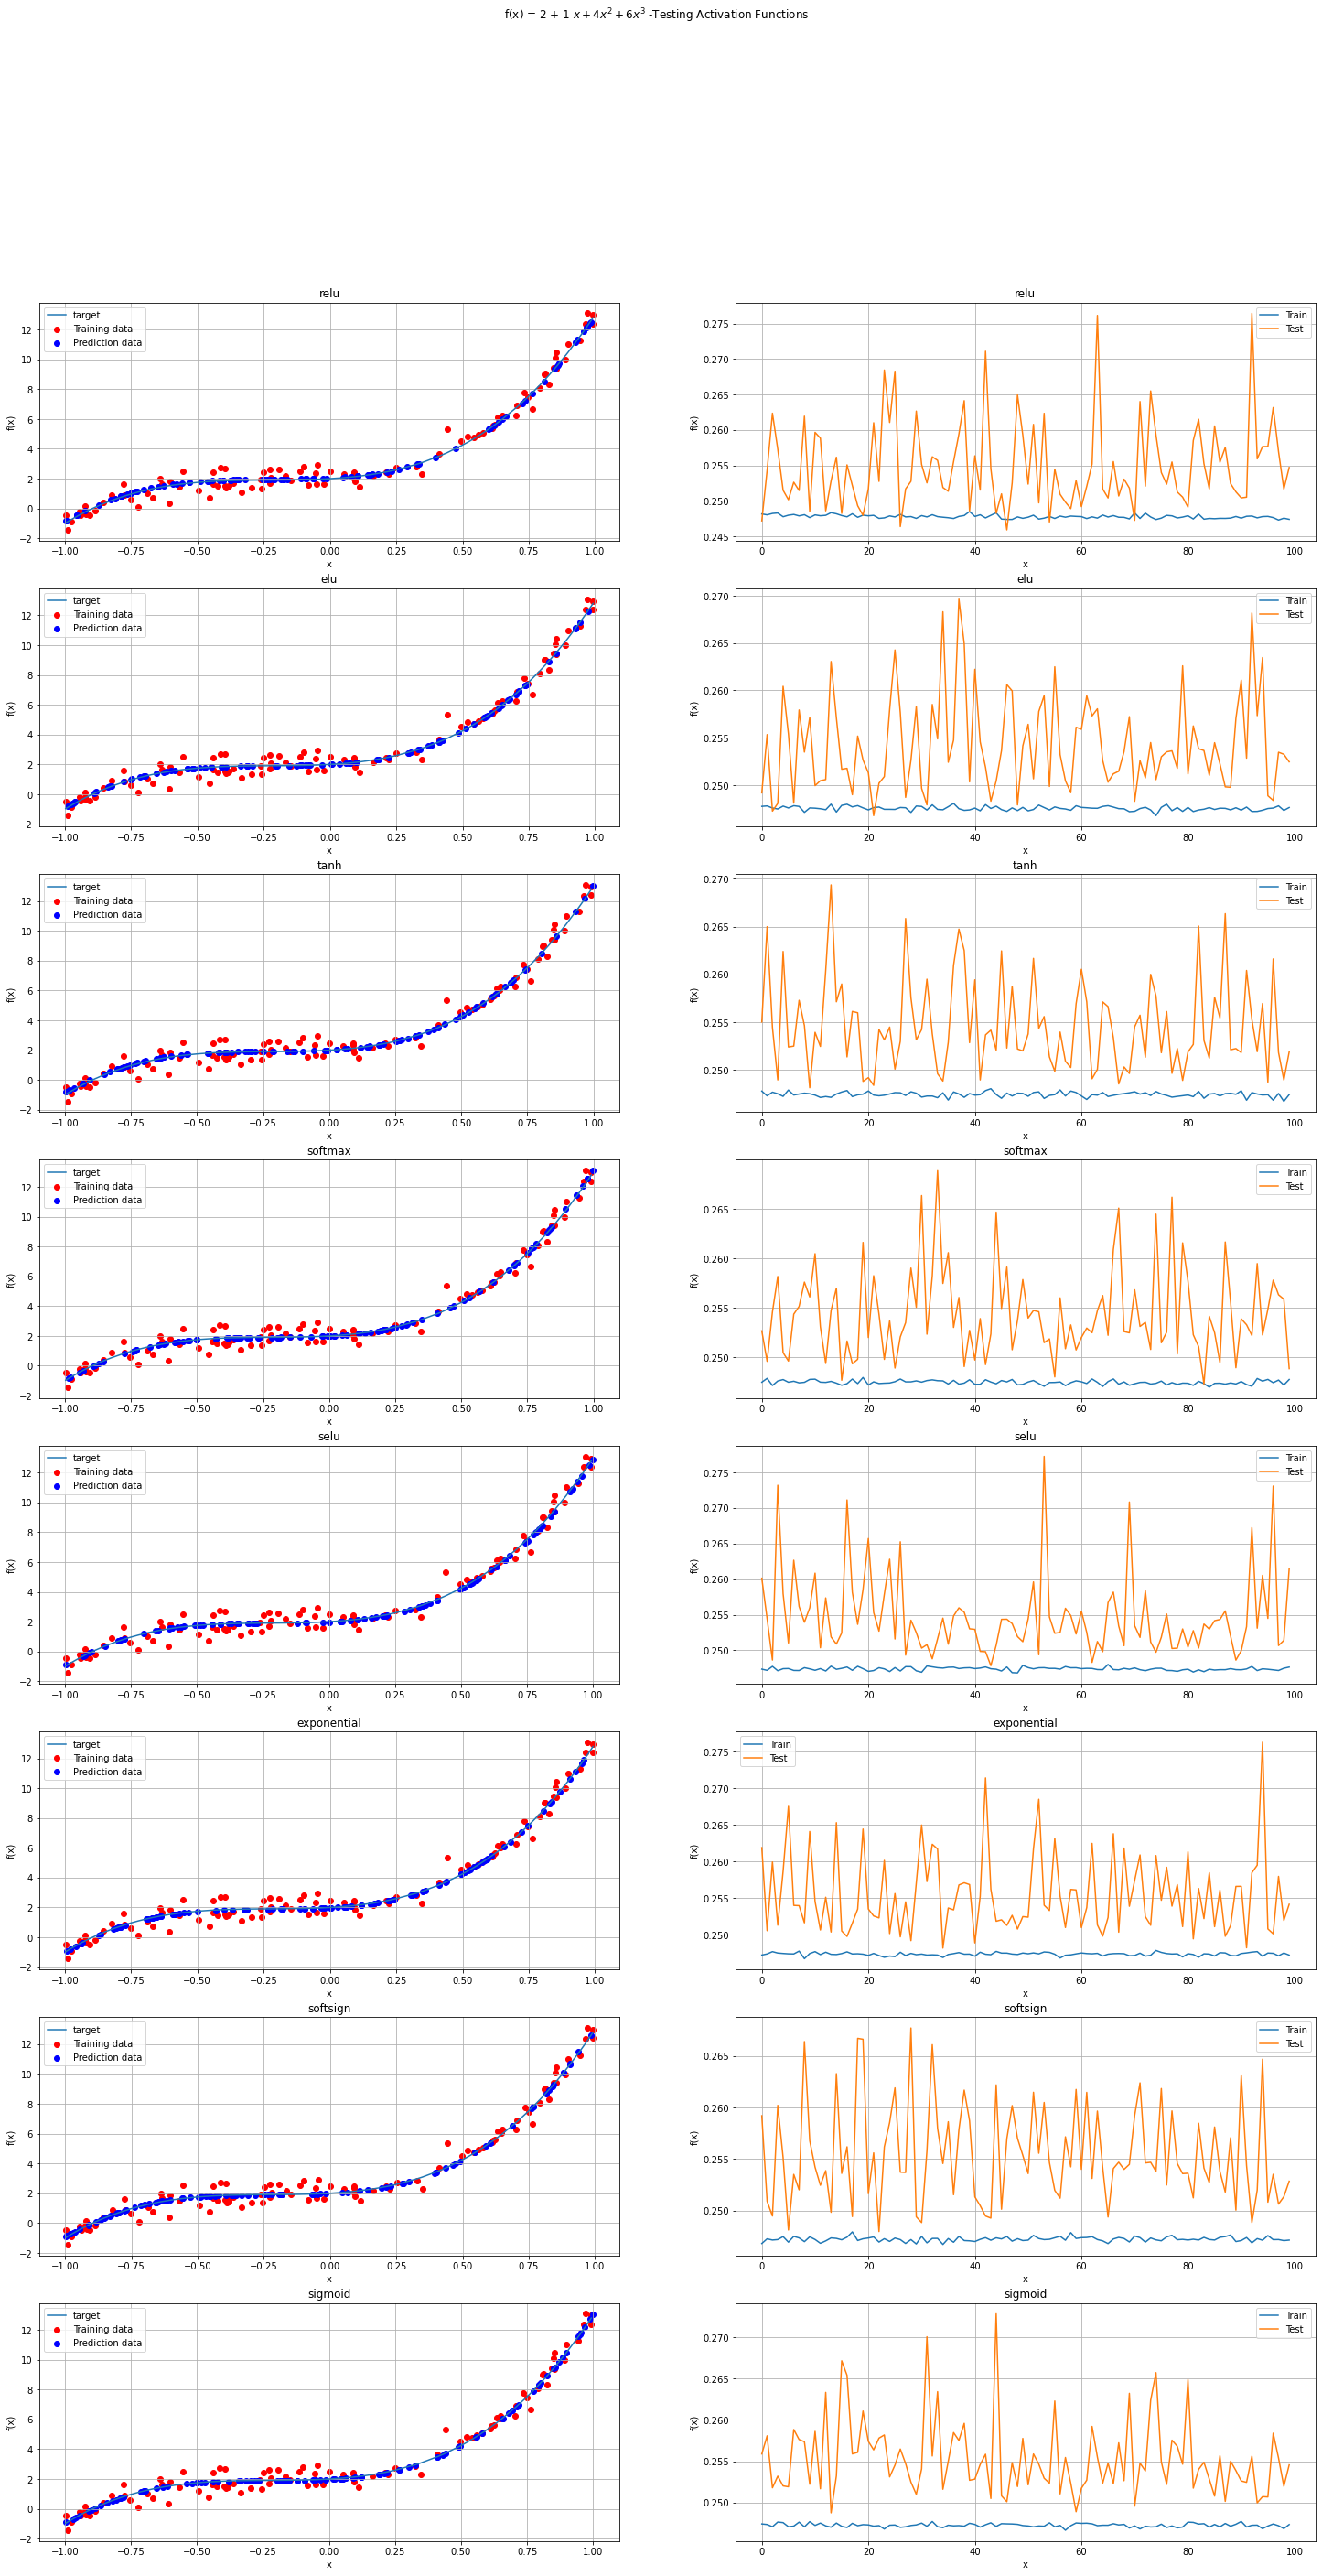

In [596]:
fig, axs = plt.subplots(8, 2, figsize = (25, 45))
fig.suptitle('f(x) = ' + str (a) + ' + ' + str(b) + ' $x + $' + str(c) + '$x^2 + $' + str(d) + '$x^3$ -Testing Activation Functions')
k = 0 
for i in range(8):
        #plot dei grafici iniziale - target e train data 
        axs[i,0].set_title(ac_functions[i])
        axs[i,0].plot(x_valid, y_target, label='target')
        axs[i,0].scatter(x_valid, y_valid, color='r', label='Training data')
        axs[i,0].scatter(x_predicteds[i], y_predicteds[i],color='b',label='Prediction data' )
        axs[i,0].set_xlabel('x')
        axs[i,0].set_ylabel('f(x)')
        axs[i,0].legend()
        axs[i,0].grid(True)
        
        axs[i,1].set_title(ac_functions[i])
        axs[i,1].plot(histories[i].history['loss'], label = "Train")
        axs[i,1].plot(histories[i].history['val_loss'], label = "Test")
        axs[i,1].set_xlabel('x')
        axs[i,1].set_ylabel('f(x)')
        axs[i,1].legend()
        axs[i,1].grid(True)
        

        print('Values for activaction function ' + ac_functions[k] + ' - Val loss = ' + str (histories[k].history['val_loss'][-1]))
        print("-----------------------------------------------------")
        k= k+1

Dopo questa prima fase di analisi, osserviamo che possiamo cominciare ad escludere l'utilizzo di aclune funzioni di attivazione che non sembrano dare la possibilità di ottenere un fit adeguato. Tra le funzinoi precedentemente studiate, continuamo l'analisi di funzioni aventi un valore di loss function inorno allo 0.25 . 
Continuiamo dunque con l'analisi di 
- tanh
- softmax 

Concentriamoci ora sulle seguenti funzioni di attivazione e modifichiamo il modello aumentanto il numero di strati densi di neuroni

Studiamo dunque quali ottimizzatori sembrano portare a dei risultati migliori 

## Ottimizzatori di Keras 

In [597]:
def model_2layer(opt, act):
    model = Sequential()
    model.add(Dense(units=20, input_dim = 1))
    model.add(Activation(act))
    model.add(Activation(act))
    model.add(Dense(units=1))
    model.compile(loss= 'mse', optimizer = opt)
    return model

Esploriamo i risultati ottenuti utilizzando gli optimizers disponibili
-    SGD
 -   RMSprop
  -  Adam
   - Adadelta
   - Adagrad
   - Adamax
   - Nadam
   - Ftrl


In [606]:
# import of the importants packages 
import numpy as np
import matplotlib.pyplot as plt

# import of the modules needed 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [607]:
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function
sigma = 0.5
y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)
Ndense = 20

In [608]:
def pol_model(act, loss, opt):
    model = Sequential()
    model.add(Dense(units=Ndense, activation = act, input_dim=1))
    model.add(Dense(units=Ndense, activation = act))
    model.add(Dense(units=1, activation = None ))
    model.compile(loss=loss,  optimizer= opt)
    return model

In [609]:
act_fun = "tanh"
optimizers = ["SGD", "RMSprop", "Adam","Adadelta", "Adagrad", "Adamax", "Nadam", "Ftrl"]
loss = 'mean_squared_error'

In [610]:
scores = [] 
histories = []
x_predicteds = []
y_predicteds = []    

for i in range(len(optimizers)):
    model = pol_model(act_fun,loss, optimizers[i])
    print('-->'+ optimizers[i])
    print('------------------------')
    #model.compile(loss='mean_squared_error',  optimizer= optimizers[i] )
    scores.append (  model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    histories.append ( model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))
    # risutlati del fit 
    x_predicteds.append ( np.random.uniform(-1, 1, 100))
    y_predicteds.append ( model.predict(x_predicteds[i]))    

-->SGD
------------------------
4/4 [==============================] - 0s 2ms/step - loss: 25.1754
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 2.9227 - val_loss: 1.1631
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6173 - val_loss: 0.5016
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.4317
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.3737
Epoch 5/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3538 - val_loss: 0.3494
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3431 - val_loss: 0.3458
Epoch 7/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3309 - val_loss: 0.3647
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.3199 - val_loss: 0.3453
Epoch 9/100
313/313 [==============================] - 0s 2ms/step - loss: 0.3094 - val_loss:

Values for activaction function SGD - Val loss = 0.371052086353302
-----------------------------------------------------
Values for activaction function RMSprop - Val loss = 0.25319647789001465
-----------------------------------------------------
Values for activaction function Adam - Val loss = 0.2742469310760498
-----------------------------------------------------
Values for activaction function Adadelta - Val loss = 7.382209300994873
-----------------------------------------------------
Values for activaction function Adagrad - Val loss = 3.751519203186035
-----------------------------------------------------
Values for activaction function Adamax - Val loss = 0.2569676637649536
-----------------------------------------------------
Values for activaction function Nadam - Val loss = 0.25494757294654846
-----------------------------------------------------
Values for activaction function Ftrl - Val loss = 4.4236063957214355
-----------------------------------------------------


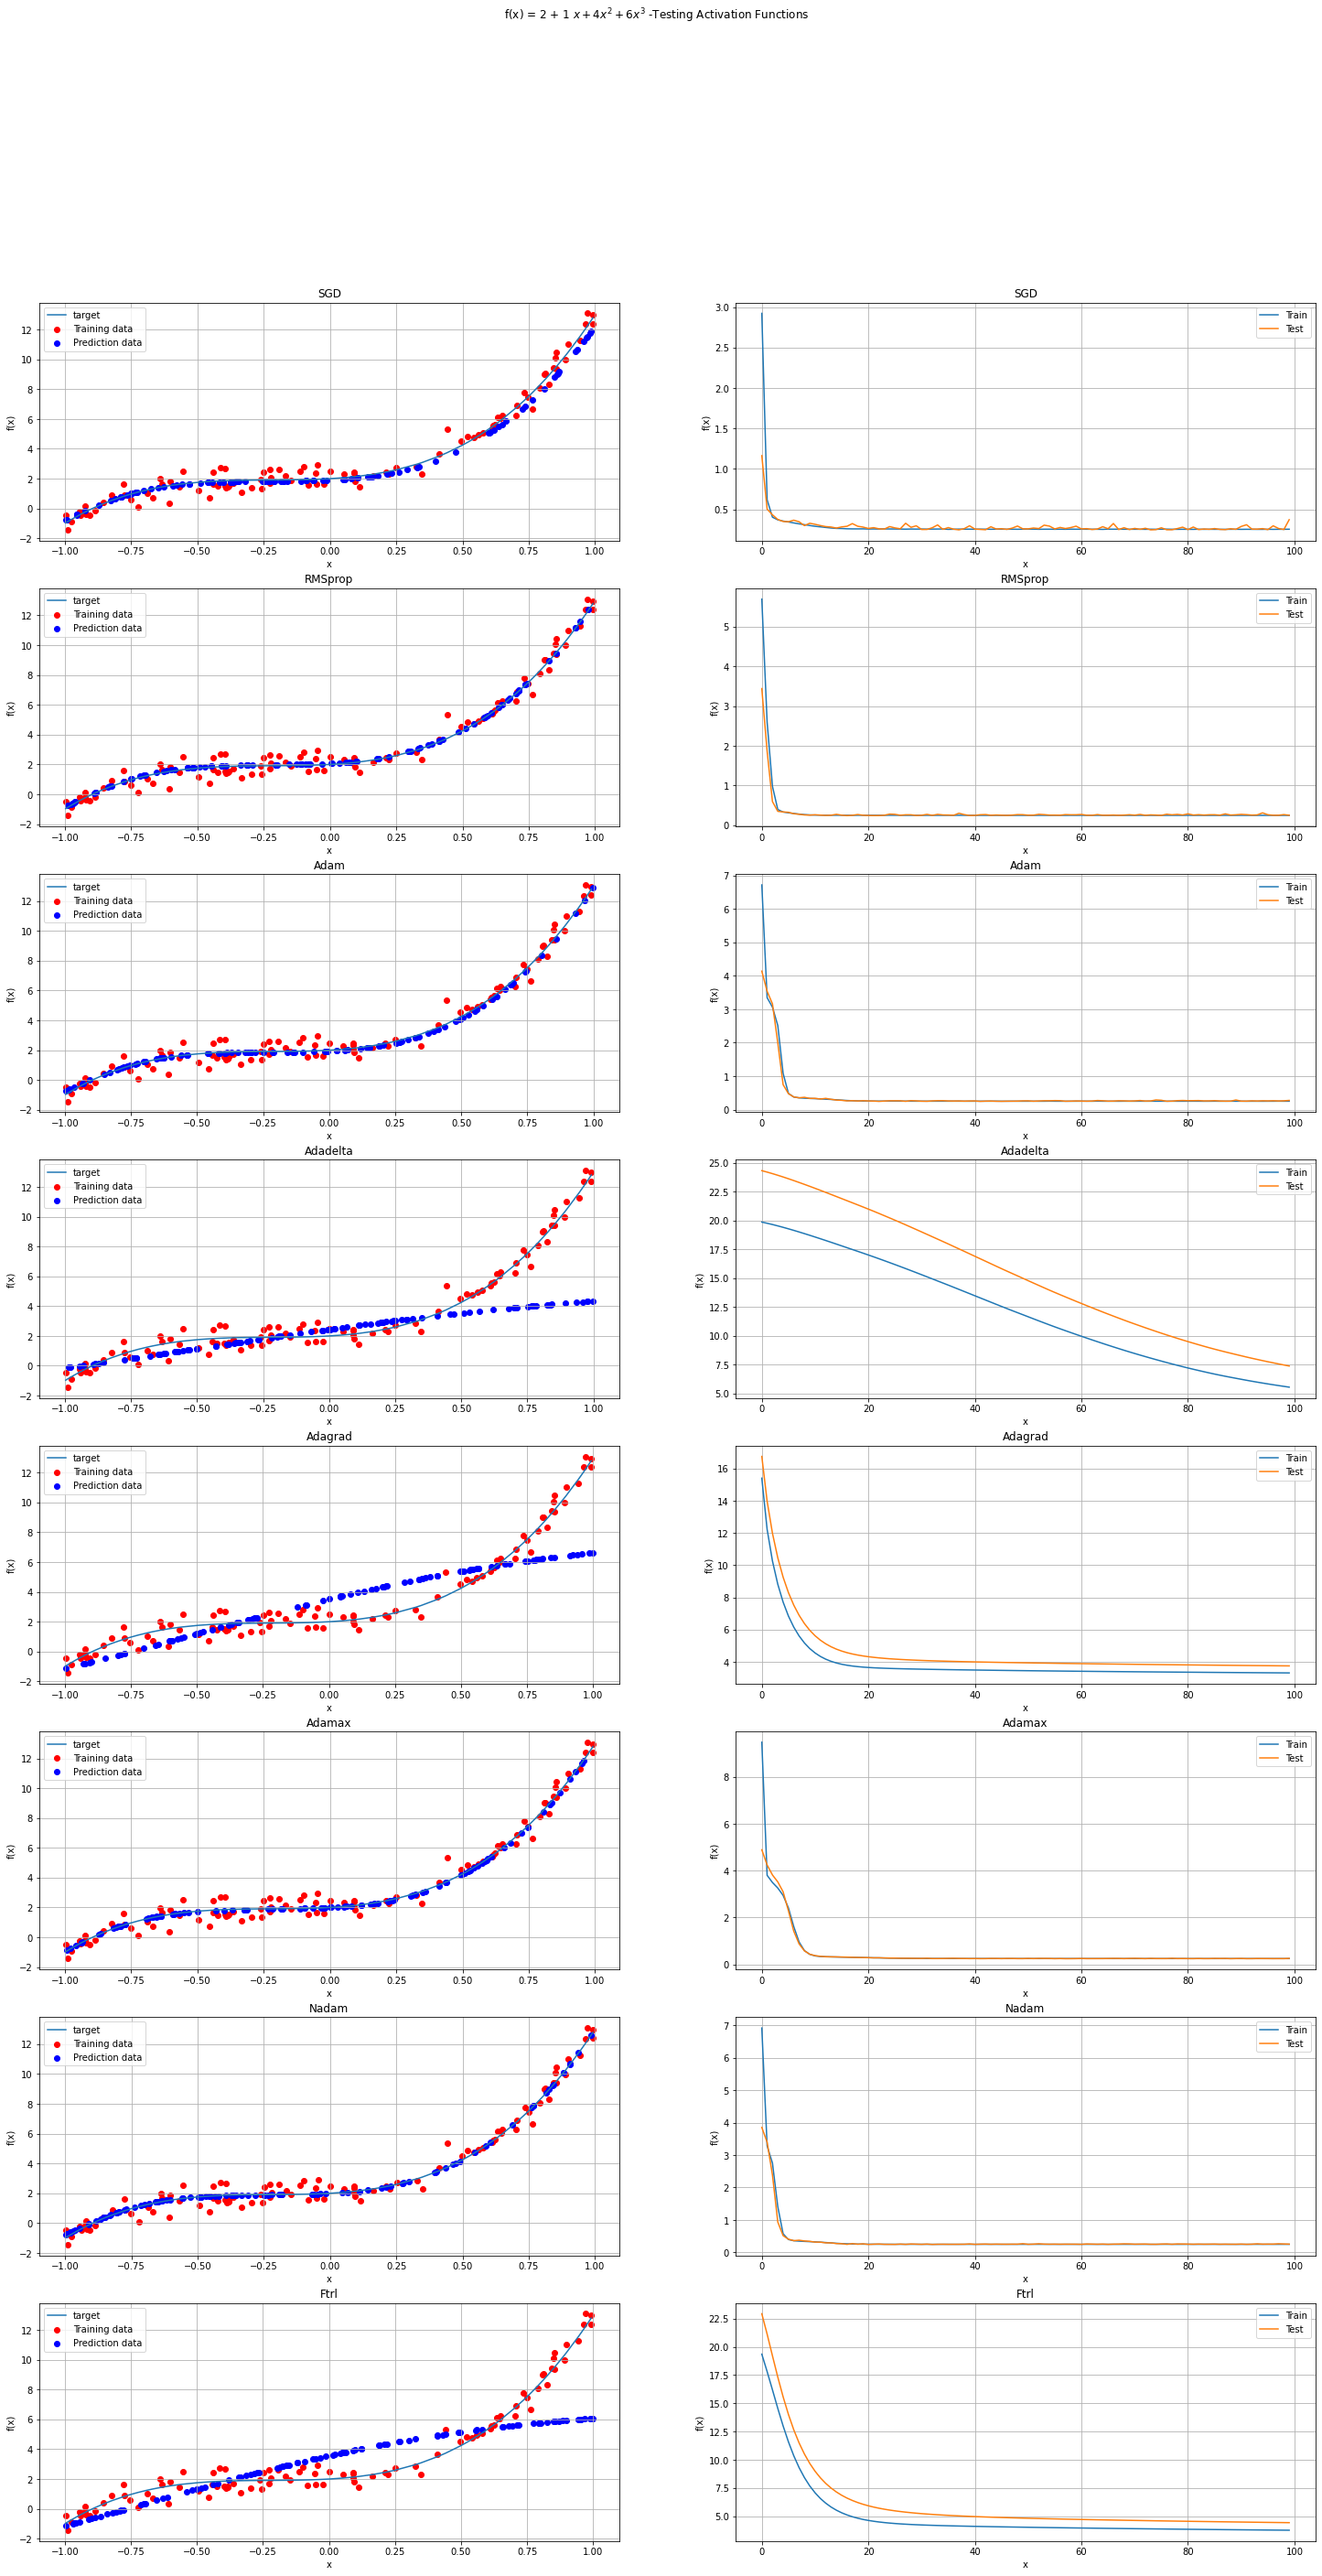

In [612]:
fig, axs = plt.subplots(len(optimizers), 2, figsize = (25, 45))
fig.suptitle('f(x) = ' + str (a) + ' + ' + str(b) + ' $x + $' + str(c) + '$x^2 + $' + str(d) + '$x^3$ -Testing Activation Functions')
k = 0 
for i in range(len(optimizers)):
        #plot dei grafici iniziale - target e train data 
        model = model_2layer(optimizers[i],act_fun)
        axs[i,0].set_title(optimizers[i])
        axs[i,0].plot(x_valid, y_target, label='target')
        axs[i,0].scatter(x_valid, y_valid, color='r', label='Training data')
        axs[i,0].scatter(x_predicteds[i], y_predicteds[i],color='b',label='Prediction data' )
        axs[i,0].set_xlabel('x')
        axs[i,0].set_ylabel('f(x)')
        axs[i,0].legend()
        axs[i,0].grid(True)
        
        axs[i,1].set_title(optimizers[i])
        axs[i,1].plot(histories[i].history['loss'], label = "Train")
        axs[i,1].plot(histories[i].history['val_loss'], label = "Test")
        axs[i,1].set_xlabel('x')
        axs[i,1].set_ylabel('f(x)')
        axs[i,1].legend()
        axs[i,1].grid(True)
        

        print('Values for activaction function ' + optimizers[k] + ' - Val loss = ' + str (histories[k].history['val_loss'][-1]))
        print("-----------------------------------------------------")
        k= k+1

L'analisi ci mostra dei risultati migliori utilizzando l'ottimizzatore Nadam 

Definito uno specifico ottimizzatore, valutiamo quale loss function ci permette di ottenere un miglior risultato 



In [617]:
# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
Ndense = 20
sigma = 0.5
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 1000) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function

y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) 
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)

In [618]:
act_fun = "tanh"
optimizer =  'Nadam'  
loss_functions = ["mean_squared_error", "mean_absolute_error", "mean_squared_logarithmic_error"]

In [619]:
def model_2layer(opt, act, loss):
    model = Sequential()
    model.add(Dense(units=20, input_dim = 1))
    model.add(Activation(act))
    model.add(Activation(act))
    model.add(Dense(units=1))
    model.compile(loss= loss, optimizer = opt)
    return model

In [620]:
scores = [] 
histories = []
x_predicteds = []
y_predicteds = []  


for i in range(len(loss_functions)):
    print('-->'+ loss_functions[i])
    print('------------------------')
    #model.compile(loss=loss_functions[i],  optimizer= optimizer )
    model = model_2layer(optimizer, act_fun,  loss_functions[i])
    scores.append (  model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    histories.append ( model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))
    # risutlati del fit 
    x_predicteds.append ( np.random.uniform(-1, 1, 100))
    y_predicteds.append ( model.predict(x_predicteds[i]))    

-->mean_squared_error
------------------------
32/32 [==============================] - 0s 2ms/step - loss: 18.6293
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 10.8409 - val_loss: 4.1777
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 3.5939 - val_loss: 3.1140
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 3.2122 - val_loss: 2.9351
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 3.0333 - val_loss: 2.7818
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 2.8732 - val_loss: 2.6319
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 2.6884 - val_loss: 2.4482
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4435 - val_loss: 2.1715
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 2.1226 - val_loss: 1.8500
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 

mean_squared_error ->Val loss = 0.25125864148139954
mean_absolute_error ->Val loss = 0.4010113775730133
mean_squared_logarithmic_error ->Val loss = 0.026842914521694183


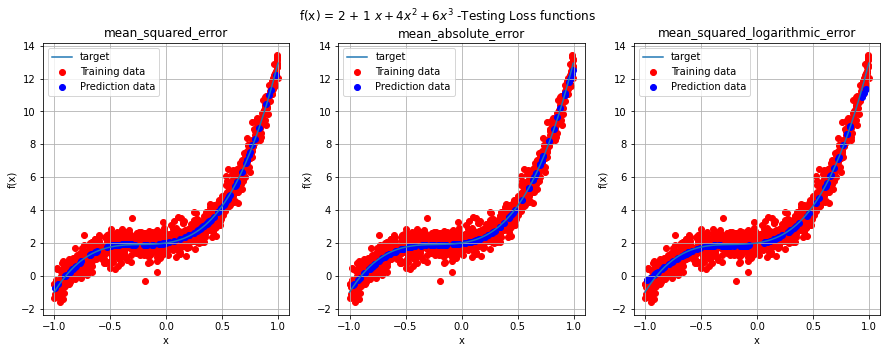

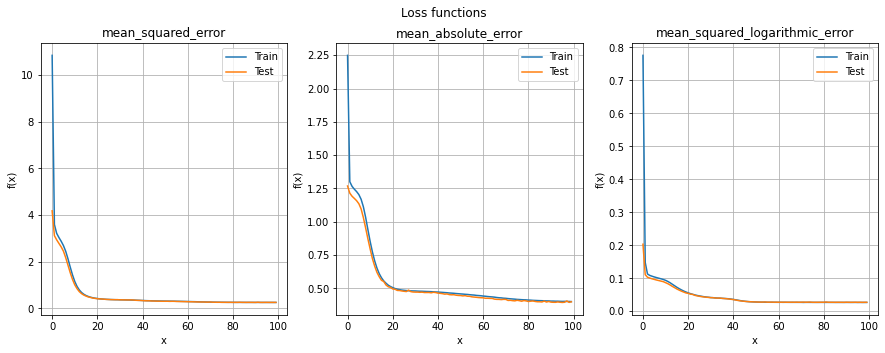

In [622]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle('f(x) = ' + str (a) + ' + ' + str(b) + ' $x + $' + str(c) + '$x^2 + $' + str(d) + '$x^3$ -Testing Loss functions ')
for j in range(3):
    #plot dei grafici iniziale - target e train data 
    axs[j].set_title(loss_functions[j])
    print(loss_functions[j] + ' ->Val loss = ' + str (histories[j].history['loss'][-1] ))
    axs[j].plot(x_valid, y_target, label='target')
    axs[j].scatter(x_valid, y_valid, color='r', label='Training data')
    axs[j].scatter(x_predicteds[j], y_predicteds[j],color='b',label='Prediction data' )
    axs[j].set_xlabel('x')
    axs[j].set_ylabel('f(x)')
    axs[j].legend()
    axs[j].grid(True)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle('Loss functions ')
for i in range(3):
        axs[i].set_title(loss_functions[i])
        axs[i].plot(histories[i].history['loss'], label = "Train")
        axs[i].plot(histories[i].history['val_loss'], label = "Test")
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('f(x)')
        axs[i].legend()
        axs[i].grid(True)

Dall'analisi precedente emerge come sia più performante la loss function mean_squared_logaritmic_error 

Utilizziamo quindi le osservazioni precedenti per ricavare il nostro modello finale. Testiamolo quindi introducendo valori di sigma sempre maggiori. 

## Riassumiamo


In [627]:
# generate training inputs
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
sigma = 0.5
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function

y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) 
y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)


In [628]:
act_fun = "tanh"
optimizer =  'Nadam'  
loss = "mean_squared_error"
model = model_2layer(optimizer, act_fun,  loss)

In [629]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
history  = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100,shuffle=True,validation_data=(x_valid, y_valid))
# risutlati del fit 
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)    

4/4 [==============================] - 0s 2ms/step - loss: 24.1837
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 12.0393 - val_loss: 7.0844
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 3.9575 - val_loss: 4.0023
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 3.3060 - val_loss: 3.4713
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 2.9197 - val_loss: 2.9937
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4297 - val_loss: 2.3676
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 1.9121 - val_loss: 1.8380
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 1.4686 - val_loss: 1.4188
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 1.1293 - val_loss: 1.1118
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.8898 - val_loss: 0.9086
Epoch 10/100
313/313 [=

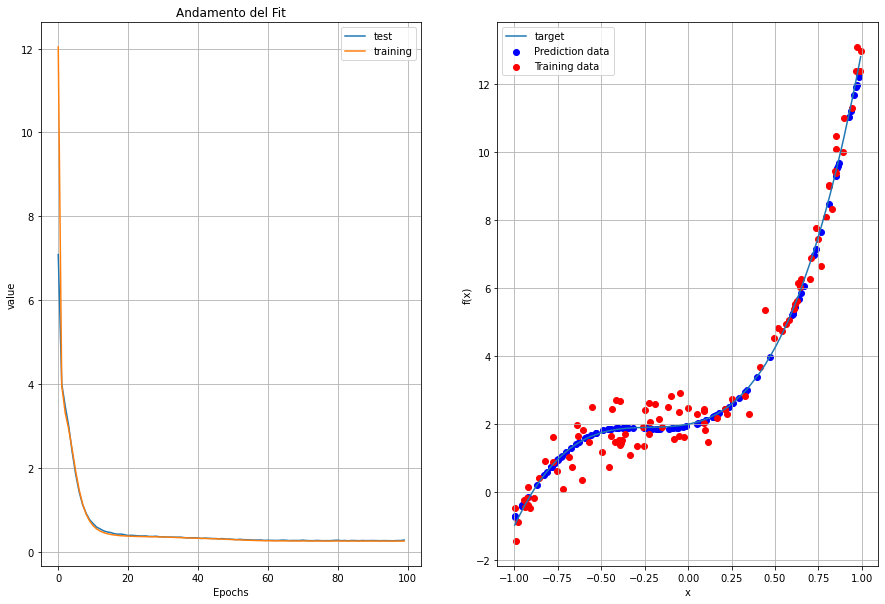

In [631]:
fig, axs = plt.subplots(1,2, figsize = (15, 10))
axs[1].plot(x_valid, y_target, label='target')
axs[1].scatter(x_predicted, y_predicted,color='b',label='Prediction data' )
axs[1].scatter(x_valid, y_valid, color='r', label='Training data')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()
axs[1].grid(True)

axs[0].set_title("Andamento del Fit")
axs[0].plot(history.history["val_loss"], label='test')
axs[0].plot(history.history["loss"],label='training' )
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('value')
axs[0].legend()
axs[0].grid(True)

In [460]:
w = model.get_weights()
print(w[0])

[[ 0.02649415 -0.06447854  0.1154871   1.0489501  -0.8520085   0.09773329
   0.33991683 -0.33574218 -0.39974466  1.1576184   1.2039627   0.14434163
  -0.38706005  0.23848596  0.4230149   0.28836456  1.6334088   0.43569177
   0.9620033   0.40319908]]


In [632]:
print(scores)

[18.62933921813965, 3.24580454826355, 1.8254450559616089]


Riassumiamo ora i risultati ottenuti, valutando il modello che abbiamo definito essere adeguato, su differenti valori di sigma. 

In [773]:
sigmas = np.linspace(0.5, 2, 4)
n= sigmas.size

In [774]:
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
Ndense = 20
N_epochs = 100

x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function

In [775]:
scores = []
histories =[]
x_predicteds = []
y_predicteds = []  
act_fun = "tanh"
optimizer =  'Nadam'  
loss = "mean_squared_error"
model = model_2layer(optimizer, act_fun,  loss)

for i in range(n):
    model = model_2layer(optimizer, act_fun,  loss)
    sigma = sigmas[i]
    y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)
    scores.append( model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    histories.append (model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))
    x_predicteds.append ( np.random.uniform(-1, 1, 100))
    y_predicteds.append ( model.predict(x_predicteds[i]))  

4/4 [==============================] - 0s 3ms/step - loss: 21.3989
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 9.3289 - val_loss: 4.8149
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 3.3509 - val_loss: 3.5315
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 3.1459 - val_loss: 3.4086
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 3.0273 - val_loss: 3.2447
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 2.9312 - val_loss: 3.1449
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 2.8343 - val_loss: 3.0073
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 2.7055 - val_loss: 2.8161
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4973 - val_loss: 2.5394
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 2.1807 - val_loss: 2.0836
Epoch 10/100
313/313 [==

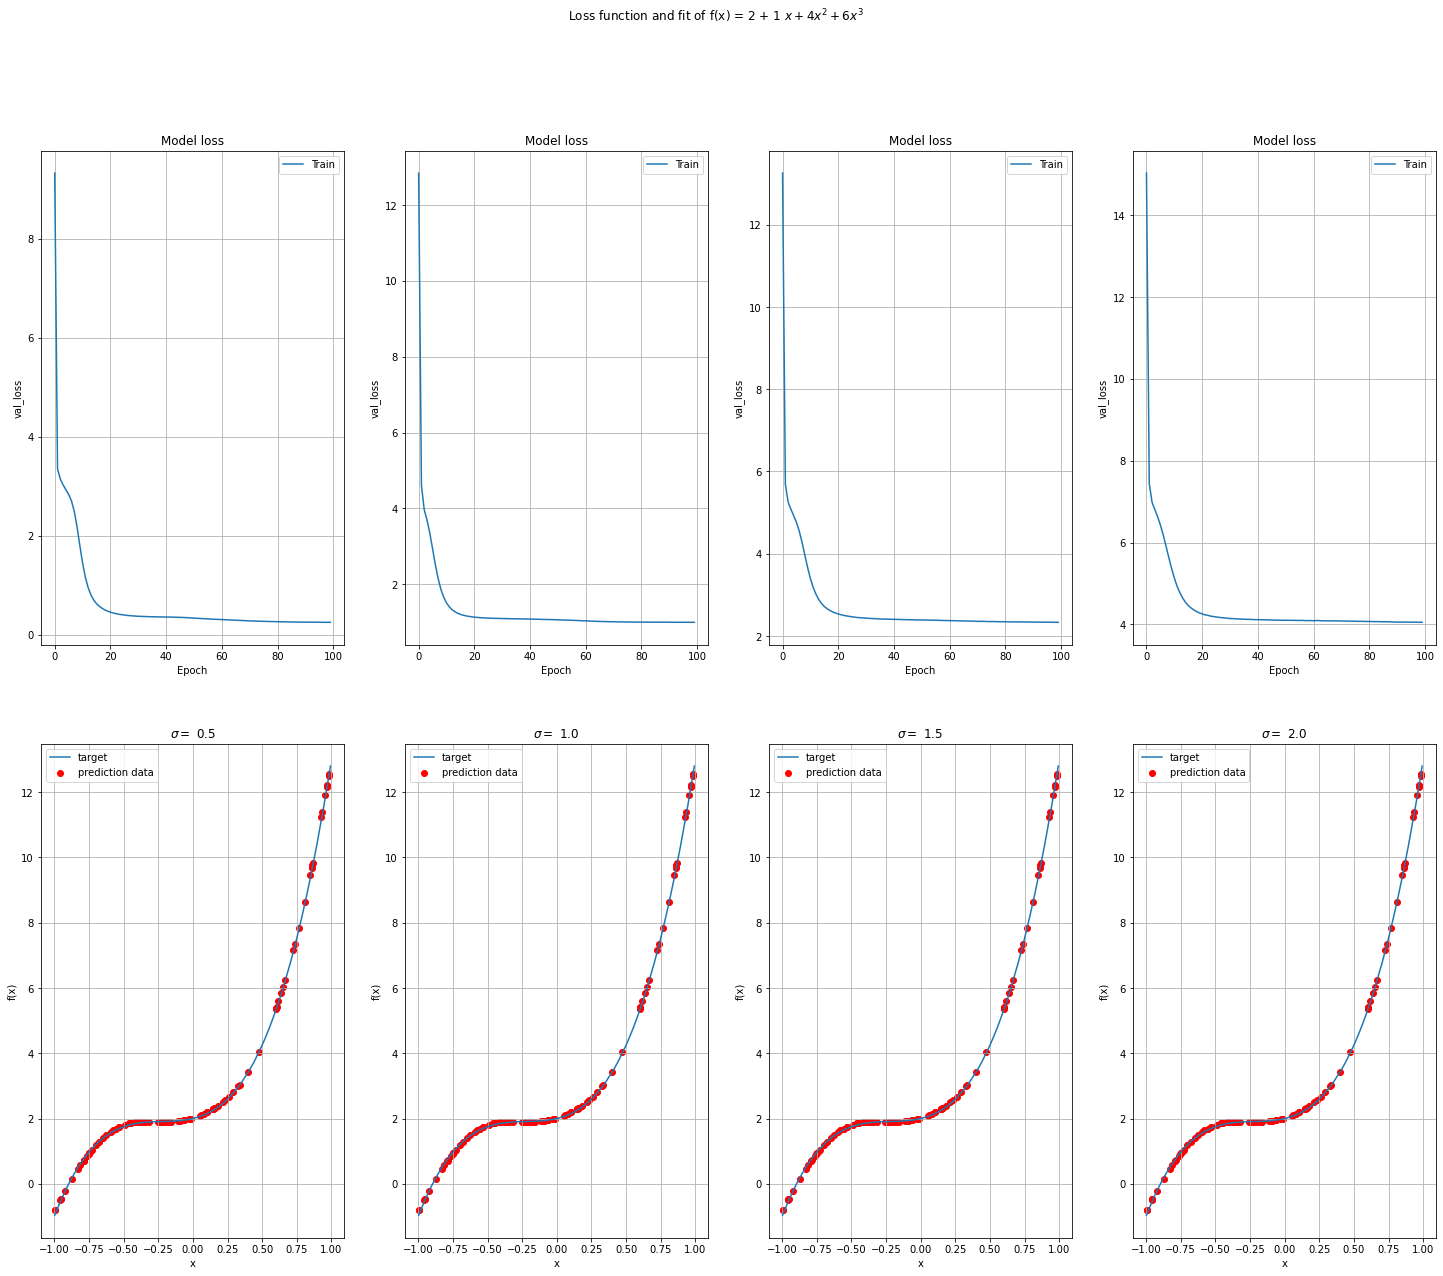

In [776]:
fig, axs = plt.subplots(2, 4, figsize = (25, 20))

fig.suptitle('Loss function and fit of f(x) = ' + str (a) + ' + ' + str(b) + ' $x + $' + str(c) + '$x^2 + $' + str(d) + '$x^3$ ')



for i in range(n):
    sigma = sigmas[i]
    y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)
    title = '$\sigma = $ ' + str (sigma)
    
    score = scores[i]#model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
    history = histories[i]#model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid))
    
    # loss function     
    # Plot training & validation loss values
    axs[0,i].plot(history.history['loss'])
    #axs[0,i].plot(history.history['val_loss'])
    axs[0,i].set_title('Model loss')
    axs[0,i].set_ylabel('val_loss')
    axs[0,i].set_xlabel('Epoch')
    axs[0,i].legend(['Train', 'Test'], loc='best')
    axs[0,i].grid()
   
    axs[1,i].set_title(title)
    axs[1,i].plot(x_valid, y_target, label='target')
    axs[1,i].scatter(x_predicted, y_predicted,color='r',label='prediction data' )
    axs[1,i].set_xlabel('x')
    axs[1,i].set_ylabel('f(x)')
    axs[1,i].legend()
    axs[1,i].grid(True)

## Ulteriori osservazioni
Proviamo a valutare il potere predittivo del modello all'esterno del range di training

In [785]:
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
Ndense = 20
N_epochs = 100

x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function

In [786]:
def model_2layer(opt, act, loss):
    model = Sequential()
    model.add(Dense(units=20, input_dim = 1))
    model.add(Activation(act))
    model.add(Activation(act))
    model.add(Dense(units=1))
    model.compile(loss= loss, optimizer = opt)
    return model

In [787]:
model = model_2layer('Nadam', "tanh",  "mean_squared_error")

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid))
 

4/4 [==============================] - 0s 2ms/step - loss: 22.0524
Epoch 1/100
313/313 [==============================] - 2s 2ms/step - loss: 13.9572 - val_loss: 9.8428
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 7.3084 - val_loss: 8.0773
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 6.9702 - val_loss: 7.7845
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 6.7873 - val_loss: 7.5553
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 6.6244 - val_loss: 7.3433
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 6.4637 - val_loss: 7.0938
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 6.2738 - val_loss: 6.8174
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 6.0455 - val_loss: 6.4845
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 5.7805 - val_loss: 6.1803
Epoch 10/100
313/313 [=

4/4 [==============================] - 0s 2ms/step


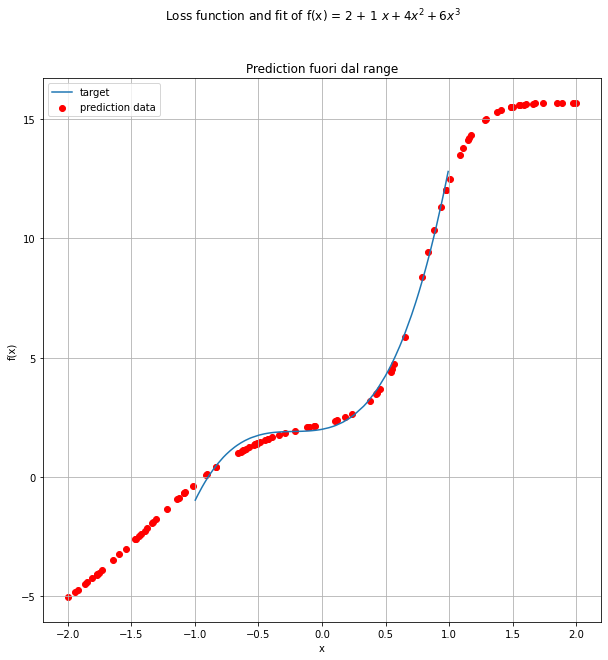

In [789]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
fig.suptitle('Loss function and fit of f(x) = ' + str (a) + ' + ' + str(b) + ' $x + $' + str(c) + '$x^2 + $' + str(d) + '$x^3$ ')
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted) 

plt.title("Prediction fuori dal range")
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_predicted, y_predicted,color='r',label='prediction data' )
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

Osserviamo che il modello non funziona adeguatamente per provare il potere predittivo

Miglioriamo quindi il modello precedentemente creato per migliorare il potere predittivo della rene neurale al di fuore del range di training

In [790]:
np.random.seed(0)# stesso seme per riproducibilità 
Ntrain = 10000
Ndense = 20
N_epochs = 100

x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 100) #valori di x "veri" 
x_valid.sort()
y_target = a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3) # ideal (target) linear function

Per farlo proviamo ad utilizzare una funzione di attivazione polinomiale

In [792]:
pow3 = lambda x: tf.pow(x,3)

modelpow = tf.keras.Sequential()
#Aggiungo un layer di 200 neuroni (denso)
modelpow.add(Dense(3, activation = pow3, input_shape=(1,) ))
modelpow.add(Dense(1, activation = None ))

modelpow.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])

# get a summary of our composed model
modelpow.summary()

Model: "sequential_393"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_596 (Dense)           (None, 3)                 6         
                                                                 
 dense_597 (Dense)           (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [791]:
scores = []
histories =[]
x_predicteds = []
y_predicteds = []  
act_fun = "tanh"
optimizer =  'Nadam'  
loss = "mean_squared_error"
model = model_2layer(optimizer, act_fun,  loss)

for i in range(n):
    model = model_2layer(optimizer, act_fun,  loss)
    sigma = sigmas[i]
    y_train = np.random.normal(a + b*x_train + c*(x_train**2) +  d*(x_train**3), sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(a + b*x_valid + c*(x_valid**2) +  d*(x_valid**3), sigma)
    scores.append( model.evaluate(x_valid, y_target, batch_size=32, verbose=1))
    histories.append (model.fit(x=x_train, y=y_train, batch_size=32, epochs=N_epochs,shuffle=True,validation_data=(x_valid, y_valid)))
    x_predicteds.append ( np.random.uniform(-1, 1, 100))
    y_predicteds.append ( model.predict(x_predicteds[i])) 

4/4 [==============================] - 0s 3ms/step - loss: 21.7720
Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 9.5495 - val_loss: 5.0144
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 3.3830 - val_loss: 3.6213
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 3.1180 - val_loss: 3.3695
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 2.9464 - val_loss: 3.1210
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 2.7137 - val_loss: 2.7435
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4216 - val_loss: 2.4446
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 2.1109 - val_loss: 2.0563
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 1.8208 - val_loss: 1.8623
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 1.5525 - val_loss: 1.5687
Epoch 10/100
313/313 [==

In [793]:
history4 = modelpow.fit(x=x_train, y=y_train,
                             batch_size=32,
                             epochs=20,
                             shuffle=True,
                             validation_data=(x_valid, y_valid) )


Epoch 1/20
313/313 [==============================] - 2s 2ms/step - loss: 18.9893 - mse: 18.9893 - val_loss: 12.8189 - val_mse: 12.8189
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 5.6931 - mse: 5.6931 - val_loss: 4.6768 - val_mse: 4.6768
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 4.5225 - mse: 4.5225 - val_loss: 4.6906 - val_mse: 4.6906
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 4.3708 - mse: 4.3708 - val_loss: 4.6572 - val_mse: 4.6572
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 4.2680 - mse: 4.2680 - val_loss: 4.5422 - val_mse: 4.5422
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 4.1940 - mse: 4.1940 - val_loss: 4.4760 - val_mse: 4.4760
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 4.1416 - mse: 4.1416 - val_loss: 4.4203 - val_mse: 4.4203
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss

Text(0.5, 1.0, 'Funzione di attivazione cubica')

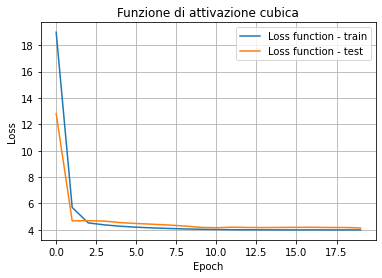

In [794]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['Loss function - train', 'Loss function - test'], loc='best')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Funzione di attivazione cubica' )

4/4 [==============================] - 0s 2ms/step
(100,)
(100,)


Text(0, 0.5, 'y')

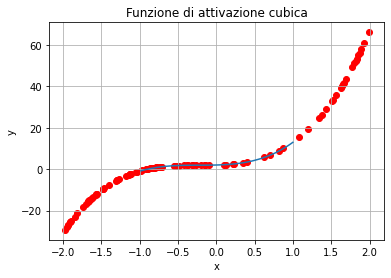

In [799]:
x_predicted = np.random.uniform(-2, 2, 100)
x_predicted.sort()
y_predicted = modelpow.predict(x_predicted).reshape(100)

x_target = np.random.uniform(-1, 1, 100)
x_target.sort()
y_target = a + b*x_target + c*(x_target**2) +  d*(x_target**3)
print(x_predicted.shape); print(y_predicted.shape);
plt.scatter(x_predicted, y_predicted, color='r')
plt.plot(x_target, y_target)
plt.grid(True)
plt.title('Funzione di attivazione cubica')
plt.xlabel('x')
plt.ylabel('y')

# Esercizio 3 
Proviamo a espandere il modello per fittare una funzinoe trigonometrica in 2D come $f(x,y) = \sin(x^2+y^2)$ nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### Soluzione 

In [823]:
#Target Definition
from mpl_toolkits import mplot3d
from numpy.lib.polynomial import poly
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
from tensorflow.keras.utils import to_categorical
import h5py
import numpy as np
import matplotlib.pyplot as plt


Definiamo la funzione 

In [824]:
def f(x, y):
    return np.sin(x ** 2 + y ** 2)

Definiamo i parametri per impostare l'apprendimento

In [848]:
#generate training inputs
N_train=10000
N_valid=300
N_epochs=100
sigma = 0.1

x1_train = np.random.uniform(-1.5, 1.5, N_train)
x2_train = np.random.uniform(-1.5, 1.5, N_train)
x_train = np.matrix([
   (x1_train[i],x2_train[i])
  for i in range(N_train)])

x1_valid = np.random.uniform(-1.5, 1.5, N_valid)
x2_valid = np.random.uniform(-1.5, 1.5, N_valid)
x_valid = np.matrix([
   (x1_valid[i],x2_valid[i])
  for i in range(N_valid)])

y_target = f(x1_valid, x2_valid)

y_valid = np.random.normal(f(x1_valid, x2_valid), sigma)
y_train = np.random.normal(f(x1_train, x2_train), sigma)

/tmp/ipykernel_286716/2983010858.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


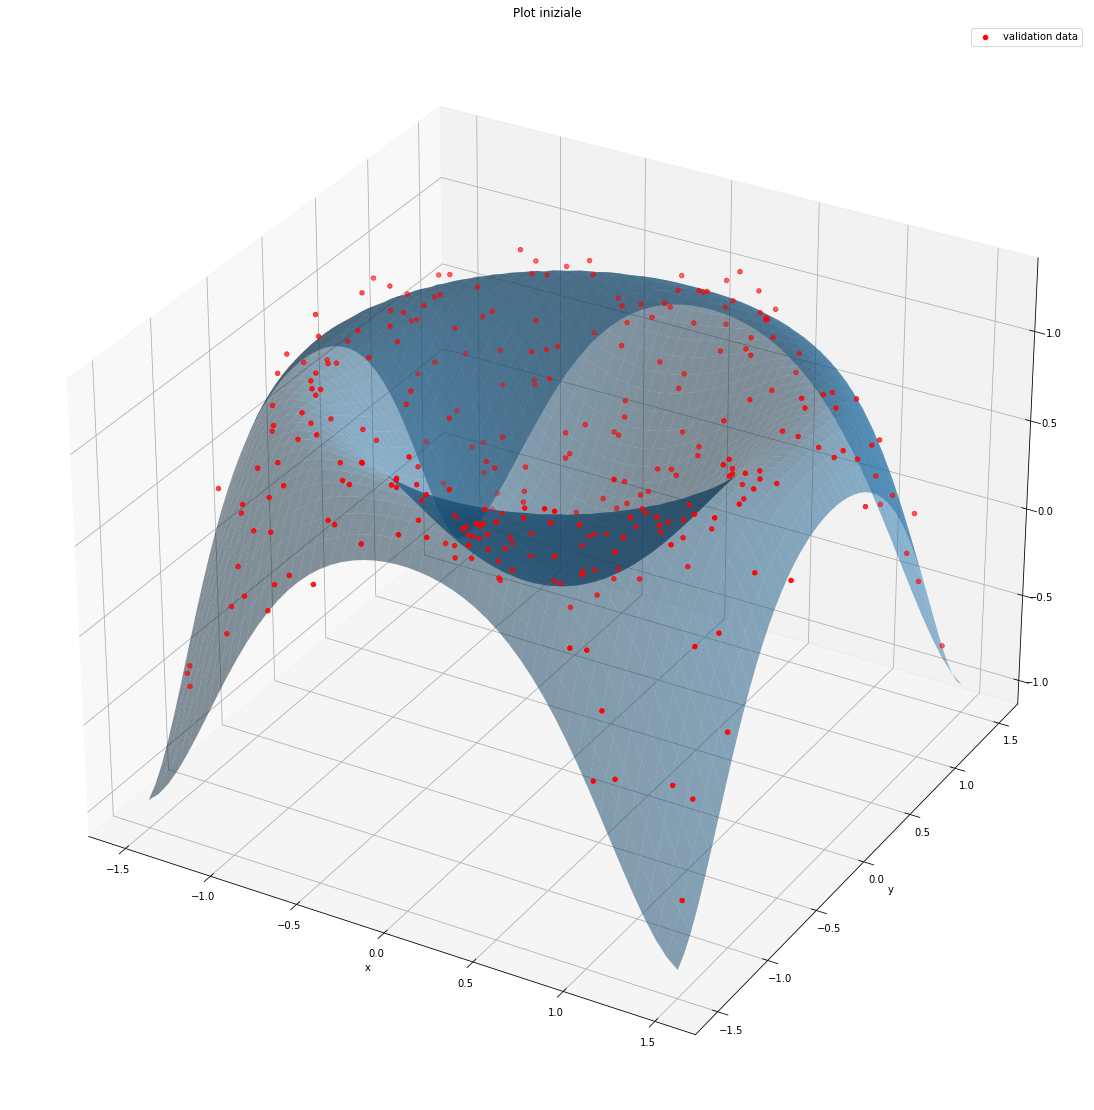

In [858]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 15))
ax = Axes3D(fig)
x = np.outer(np.linspace(-1.5, 1.5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x** 2 + y** 2)
ax.set_title("Plot iniziale")
ax.plot_surface(x,y,z, alpha=.5)
ax.scatter(x1_valid, x2_valid, y_valid, marker='o', color='red', label='validation data')#c=Z

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

Definiamo un modello. De finiamo un modello con funzione si attivazione polinomiale, In particolare definiamo quattro strati densi di 5 neutoni e infine un ultimo strato con diversa funzione di attivazione. Scegliamo la funzinoe di attivazione "elu" per l'ultimo strato. 

In [862]:
model3D = tf.keras.Sequential(
    [
        Dense(5, activation = lambda x: tf.pow(x,2), input_shape=(2,), name = "Dense1" ),
        Dense(5, activation = lambda x: tf.pow(x,2), name="Dense2"),
        Dense(5, activation = lambda x: tf.pow(x,2), name="Dense3"),
        Dense(5, activation = lambda x: tf.pow(x,2), name="Dense4"),
        Dense(1, activation='elu', name="Dense_fin"),
    ]
)

model3D.compile(optimizer=tf.keras.optimizers.Nadam(), loss='mse', metrics=['mse'])

#model3D.summary()


In [863]:
history3D = model3D.fit(x = x_train, y=y_train,batch_size=32,epochs=20,shuffle=True,validation_data=(x_valid, y_valid))

Epoch 1/20
313/313 [==============================] - 2s 2ms/step - loss: 1.0166 - mse: 1.0166 - val_loss: 0.2953 - val_mse: 0.2953
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.2063 - mse: 0.2063 - val_loss: 0.1722 - val_mse: 0.1722
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1377 - val_mse: 0.1377
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0955 - val_mse: 0.0955
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - mse: 0.0788 - val_loss: 0.0924 - val_mse: 0.0924
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - mse: 0.0761 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.

Text(0.5, 1.0, 'Funzione di attivazione polinomiale')

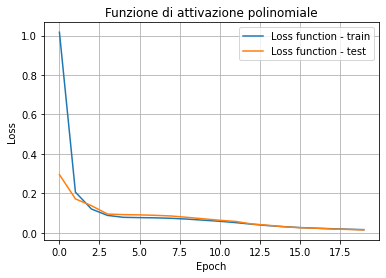

In [864]:
plt.plot(history3D.history['loss'])
plt.plot(history3D.history['val_loss'])
plt.legend(['Loss function - train', 'Loss function - test'], loc='best')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Funzione di attivazione polinomiale' )

32/32 [==============================] - 0s 2ms/step
(1000, 1)


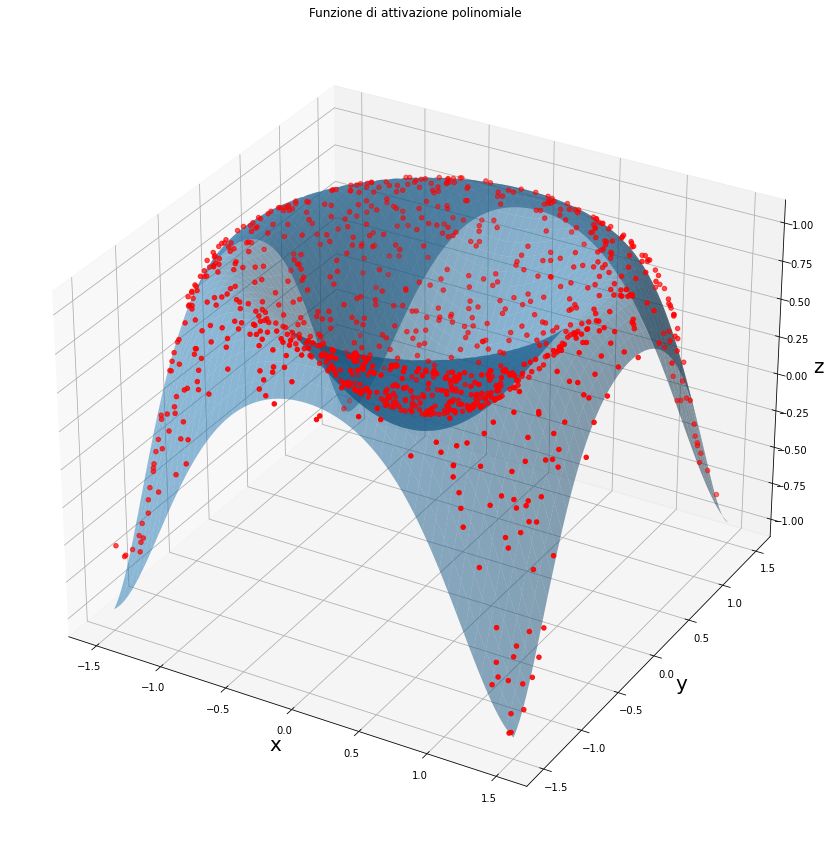

In [865]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_target = np.linspace(-3/2, 3/2, 1000)
y_target = np.linspace(-3/2, 3/2, 1000)
x_target, y_target = np.meshgrid(x_target, y_target)
z_target = np.sin(np.power(x_target,2) + np.power(y_target,2))

x_pred = np.random.uniform(-3/2, 3/2, 1000)
y_pred = np.random.uniform(-3/2, 3/2, 1000)
z_pred = model3D.predict(np.c_[x_pred, y_pred])
print(z_pred.shape)

ax.plot_surface(x_target, y_target, z_target, label='target figure', alpha = 0.5)
ax.scatter(x_pred, y_pred, z_pred, color = 'red')
ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('z', fontsize = 20)
ax.grid(True)
ax.set_title('Funzione di attivazione polinomiale')

fig.set_figheight(15)
fig.set_figwidth(15)

## Commenti 
Osserviamo che il modello proposto sembra fittare adeguatamente i dati e sembra aver dato una previsione corretta dell'andamento dei dati. 